We have to build separate models that can predict (i) the minimum temperature for the next day and (ii) the maximum temperature for the next day based on the details provided in the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset:
df=pd.read_csv('C:/Users/Azhar1/Documents/FlipRobo/Project_Evaluation/Project_Phase 2/temperature.csv')

# Exploratory Data Analysis

In [4]:
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [29]:
df.shape

(7752, 25)

The dimension of our data is 7752 rows * 25 columns

In [30]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

Except date column all columns are float datatype.

In [31]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [32]:
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7750.000000   7682.000000   7682.000000  7677.000000  7677.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.211568      2.969999      2.413961    14.668111     7.192004   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    45.963543    84.222862   
50%      13.000000     29.900000     23.400000    55.039024    89.793480   
75%      19.000000     32.000000     24.900000    67.190056    93.743629   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7677.000000       7677.000000  7677.000000  7677.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.947191          2.345347     2.183836    33.730589   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673499         22.089739     5.678705    37.266753   
50%           29.703426         23.760199     6.547470    56.865482   
75%           31.710450         25.152909     8.032276    84.223616   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7677.000000  ...  7677.000000  7677.000000  7677.000000  7752.000000   
mean      0.368774  ...     0.485003     0.278200     0.269407    37.544722   
std       0.262458  ...     1.762807     1.161809     1.206214     0.050352   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.146654  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.315697  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.575489  ...     0.018364     0.007896     0.000041    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

               lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7752.000000  7752.000000  7752.000000      7752.000000  7725.000000   
mean    126.991397    61.867972     1.257048      5341.502803    30.274887   
std       0.079435    54.279780     1.370444       429.158867     3.128010   
min     126.826000    12.370000     0.098475      4329.520508    17.400000   
25%     126.937000    28.700000     0.271300      4999.018555    28.200000   
50%     126.995000    45.716000     0.618000      5436.345215    30.500000   
75%     127.042000    59.832400     1.767800      5728.316406    32.600000   
max     127.135000   212.335000     5.178230      5992.895996    38.900000   

         Next_Tmin  
count  7725.000000  
mean     22.932220  
std       2.487613  
min      11.300000  
25%      21.300000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [10]:
#printing the unique values available in the dataset

for i in df.columns:
    print(df[i].value_counts())
    print('*'*65)

1.0     310
14.0    310
24.0    310
23.0    310
22.0    310
21.0    310
20.0    310
19.0    310
18.0    310
17.0    310
16.0    310
15.0    310
13.0    310
2.0     310
12.0    310
11.0    310
10.0    310
9.0     310
8.0     310
7.0     310
6.0     310
5.0     310
4.0     310
3.0     310
25.0    310
Name: station, dtype: int64
*****************************************************************
30-06-2013    25
18-07-2016    25
25-07-2016    25
24-07-2016    25
23-07-2016    25
              ..
09-08-2014    25
08-08-2014    25
07-08-2014    25
06-08-2014    25
30-08-2017    25
Name: Date, Length: 310, dtype: int64
*****************************************************************
31.4    112
29.4    111
29.1    108
29.7    107
31.9    105
       ... 
36.9      1
21.2      1
20.1      1
36.4      1
20.3      1
Name: Present_Tmax, Length: 167, dtype: int64
*****************************************************************
24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 

In [3]:
#checking the number of null values present in each columns 

df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

1. Five columns are having no null values.
2. All other columns are having null values.
3. 'station' and 'date' columns can be dropped off as they do not have any inference on our working model.

In [4]:
# Filling null value columns using median of the column

for col in df.columns:
    if col not in ['station', 'Date']:
        df[col]=df[col].replace(np.nan, df[col].median())

In [5]:
#checking for null values again
df.isnull().sum()

station             2
Date                2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

We can see that now our data has no null values (except date column). 

In [39]:
# Checking the unique values in each column
for column in df.columns:
    print(f"{column}: No of unique values {df[column].nunique()}")

station: No of unique values 25
Date: No of unique values 310
Present_Tmax: No of unique values 167
Present_Tmin: No of unique values 155
LDAPS_RHmin: No of unique values 7672
LDAPS_RHmax: No of unique values 7664
LDAPS_Tmax_lapse: No of unique values 7675
LDAPS_Tmin_lapse: No of unique values 7675
LDAPS_WS: No of unique values 7675
LDAPS_LH: No of unique values 7675
LDAPS_CC1: No of unique values 7569
LDAPS_CC2: No of unique values 7582
LDAPS_CC3: No of unique values 7599
LDAPS_CC4: No of unique values 7524
LDAPS_PPT1: No of unique values 2812
LDAPS_PPT2: No of unique values 2510
LDAPS_PPT3: No of unique values 2356
LDAPS_PPT4: No of unique values 1918
lat: No of unique values 12
lon: No of unique values 25
DEM: No of unique values 25
Slope: No of unique values 27
Solar radiation: No of unique values 1575
Next_Tmax: No of unique values 183
Next_Tmin: No of unique values 157


In [40]:
df.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.112582      0.131525    -0.066729   
Present_Tmax      0.112582      1.000000      0.618769    -0.205341   
Present_Tmin      0.131525      0.618769      1.000000     0.121800   
LDAPS_RHmin      -0.066729     -0.205341      0.121800     1.000000   
LDAPS_RHmax      -0.166953     -0.300261     -0.012659     0.578770   
LDAPS_Tmax_lapse  0.069107      0.570287      0.464420    -0.564575   
LDAPS_Tmin_lapse  0.104753      0.624229      0.764239     0.089346   
LDAPS_WS          0.005275     -0.123565     -0.037682     0.294537   
LDAPS_LH         -0.133339      0.134216     -0.011331    -0.070654   
LDAPS_CC1         0.006917     -0.313176      0.082000     0.613885   
LDAPS_CC2         0.003396     -0.214904      0.088309     0.745482   
LDAPS_CC3         0.000694     -0.145477     -0.005304     0.689720   
LDAPS_CC4         0.006124     -0.142549     -0.047496     0.514163   
LDAPS_PPT1       -0.002708     -0.111148      0.109085     0.262875   
LDAPS_PPT2       -0.008247     -0.101362      0.064851     0.391110   
LDAPS_PPT3       -0.012458     -0.122051     -0.049017     0.240831   
LDAPS_PPT4       -0.010399     -0.101118     -0.065550     0.168797   
lat              -0.237502     -0.052659     -0.078547     0.087093   
lon              -0.118704      0.008990     -0.043509    -0.076232   
DEM              -0.255830     -0.187138     -0.250299     0.102108   
Slope            -0.090061     -0.105884     -0.146460     0.123736   
Solar radiation  -0.019001     -0.025401      0.053638     0.244643   
Next_Tmax         0.107900      0.610256      0.471723    -0.439171   
Next_Tmin         0.128216      0.622700      0.796657     0.094061   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.166953          0.069107          0.104753  0.005275   
Present_Tmax        -0.300261          0.570287          0.624229 -0.123565   
Present_Tmin        -0.012659          0.464420          0.764239 -0.037682   
LDAPS_RHmin          0.578770         -0.564575          0.089346  0.294537   
LDAPS_RHmax          1.000000         -0.373274         -0.113914  0.134786   
LDAPS_Tmax_lapse    -0.373274          1.000000          0.654013 -0.311973   
LDAPS_Tmin_lapse    -0.113914          0.654013          1.000000 -0.130245   
LDAPS_WS             0.134786         -0.311973         -0.130245  1.000000   
LDAPS_LH             0.238183          0.047954         -0.134906  0.007115   
LDAPS_CC1            0.436097         -0.438410          0.010691  0.289792   
LDAPS_CC2            0.390879         -0.523594          0.047545  0.261386   
LDAPS_CC3            0.226434         -0.541260         -0.044233  0.243402   
LDAPS_CC4            0.130008         -0.429456         -0.080587  0.221066   
LDAPS_PPT1           0.267698         -0.111105          0.037727  0.153213   
LDAPS_PPT2           0.228398         -0.242113          0.000588  0.192427   
LDAPS_PPT3           0.134087         -0.188133         -0.088791  0.162173   
LDAPS_PPT4           0.117376         -0.160300         -0.094855  0.144550   
lat                  0.195761         -0.042093         -0.096252  0.036646   
lon                  0.025662          0.090665         -0.026700 -0.059448   
DEM                  0.177134         -0.178895         -0.195445  0.190995   
Slope                0.219557         -0.162332         -0.185839  0.171577   
Solar radiation      0.148259          0.047820          0.159445  0.122966   
Next_Tmax           -0.281282          0.827473          0.588224 -0.345578   
Next_Tmin           -0.070193          0.587066          0.881074 -0.098730   

                  LDAPS_LH  LDAPS_CC1  ...  LDAPS_PPT2  LDAPS_PPT3  \
station          -0.133339   0.006917  ...   -0.008247   -0.012458   
Present_Tmax      0.134216  -0.313176  ...   -0.101362   -0.122051   
Present_Tmin     -0.011331   0.082000  ...    0.064851   

# Data Visualization

<Axes: >

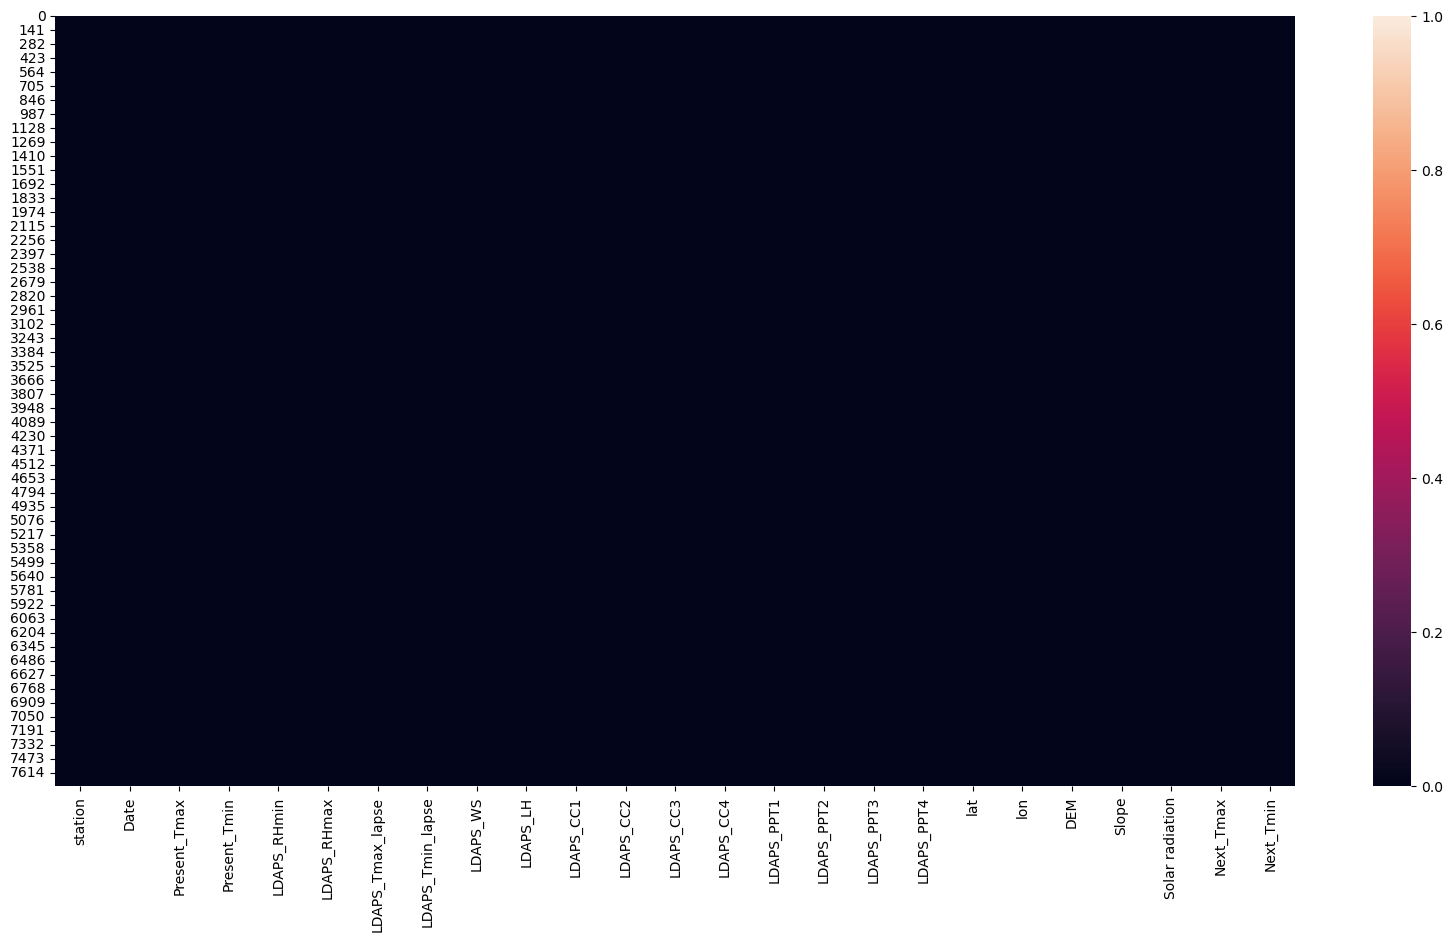

In [41]:
#heatmap for null values

plt.figure(figsize= (20,10))
sns.heatmap(df.isnull())

Graph showing no null values

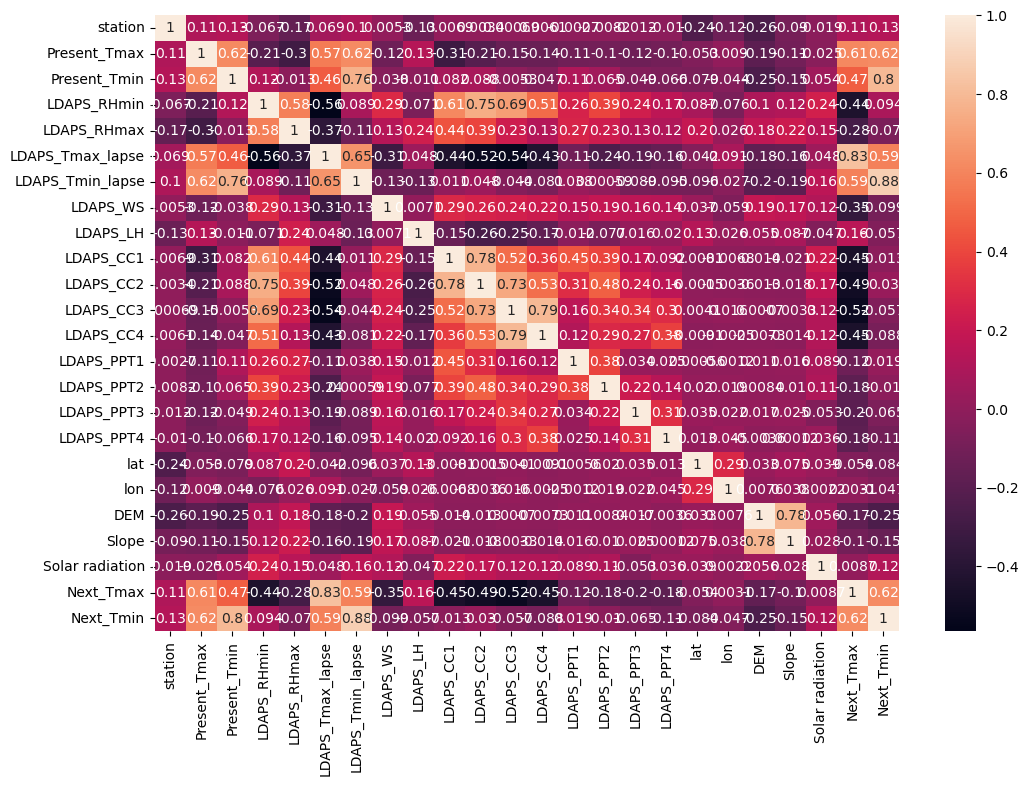

In [42]:
#Showing the attributes are related to each other can be seen by plotting the heatmap over the attributes correlation value
corr = df.corr()
plt.figure(figsize=(12,8), facecolor='white')
sns.heatmap(corr, annot=True)
plt.show()

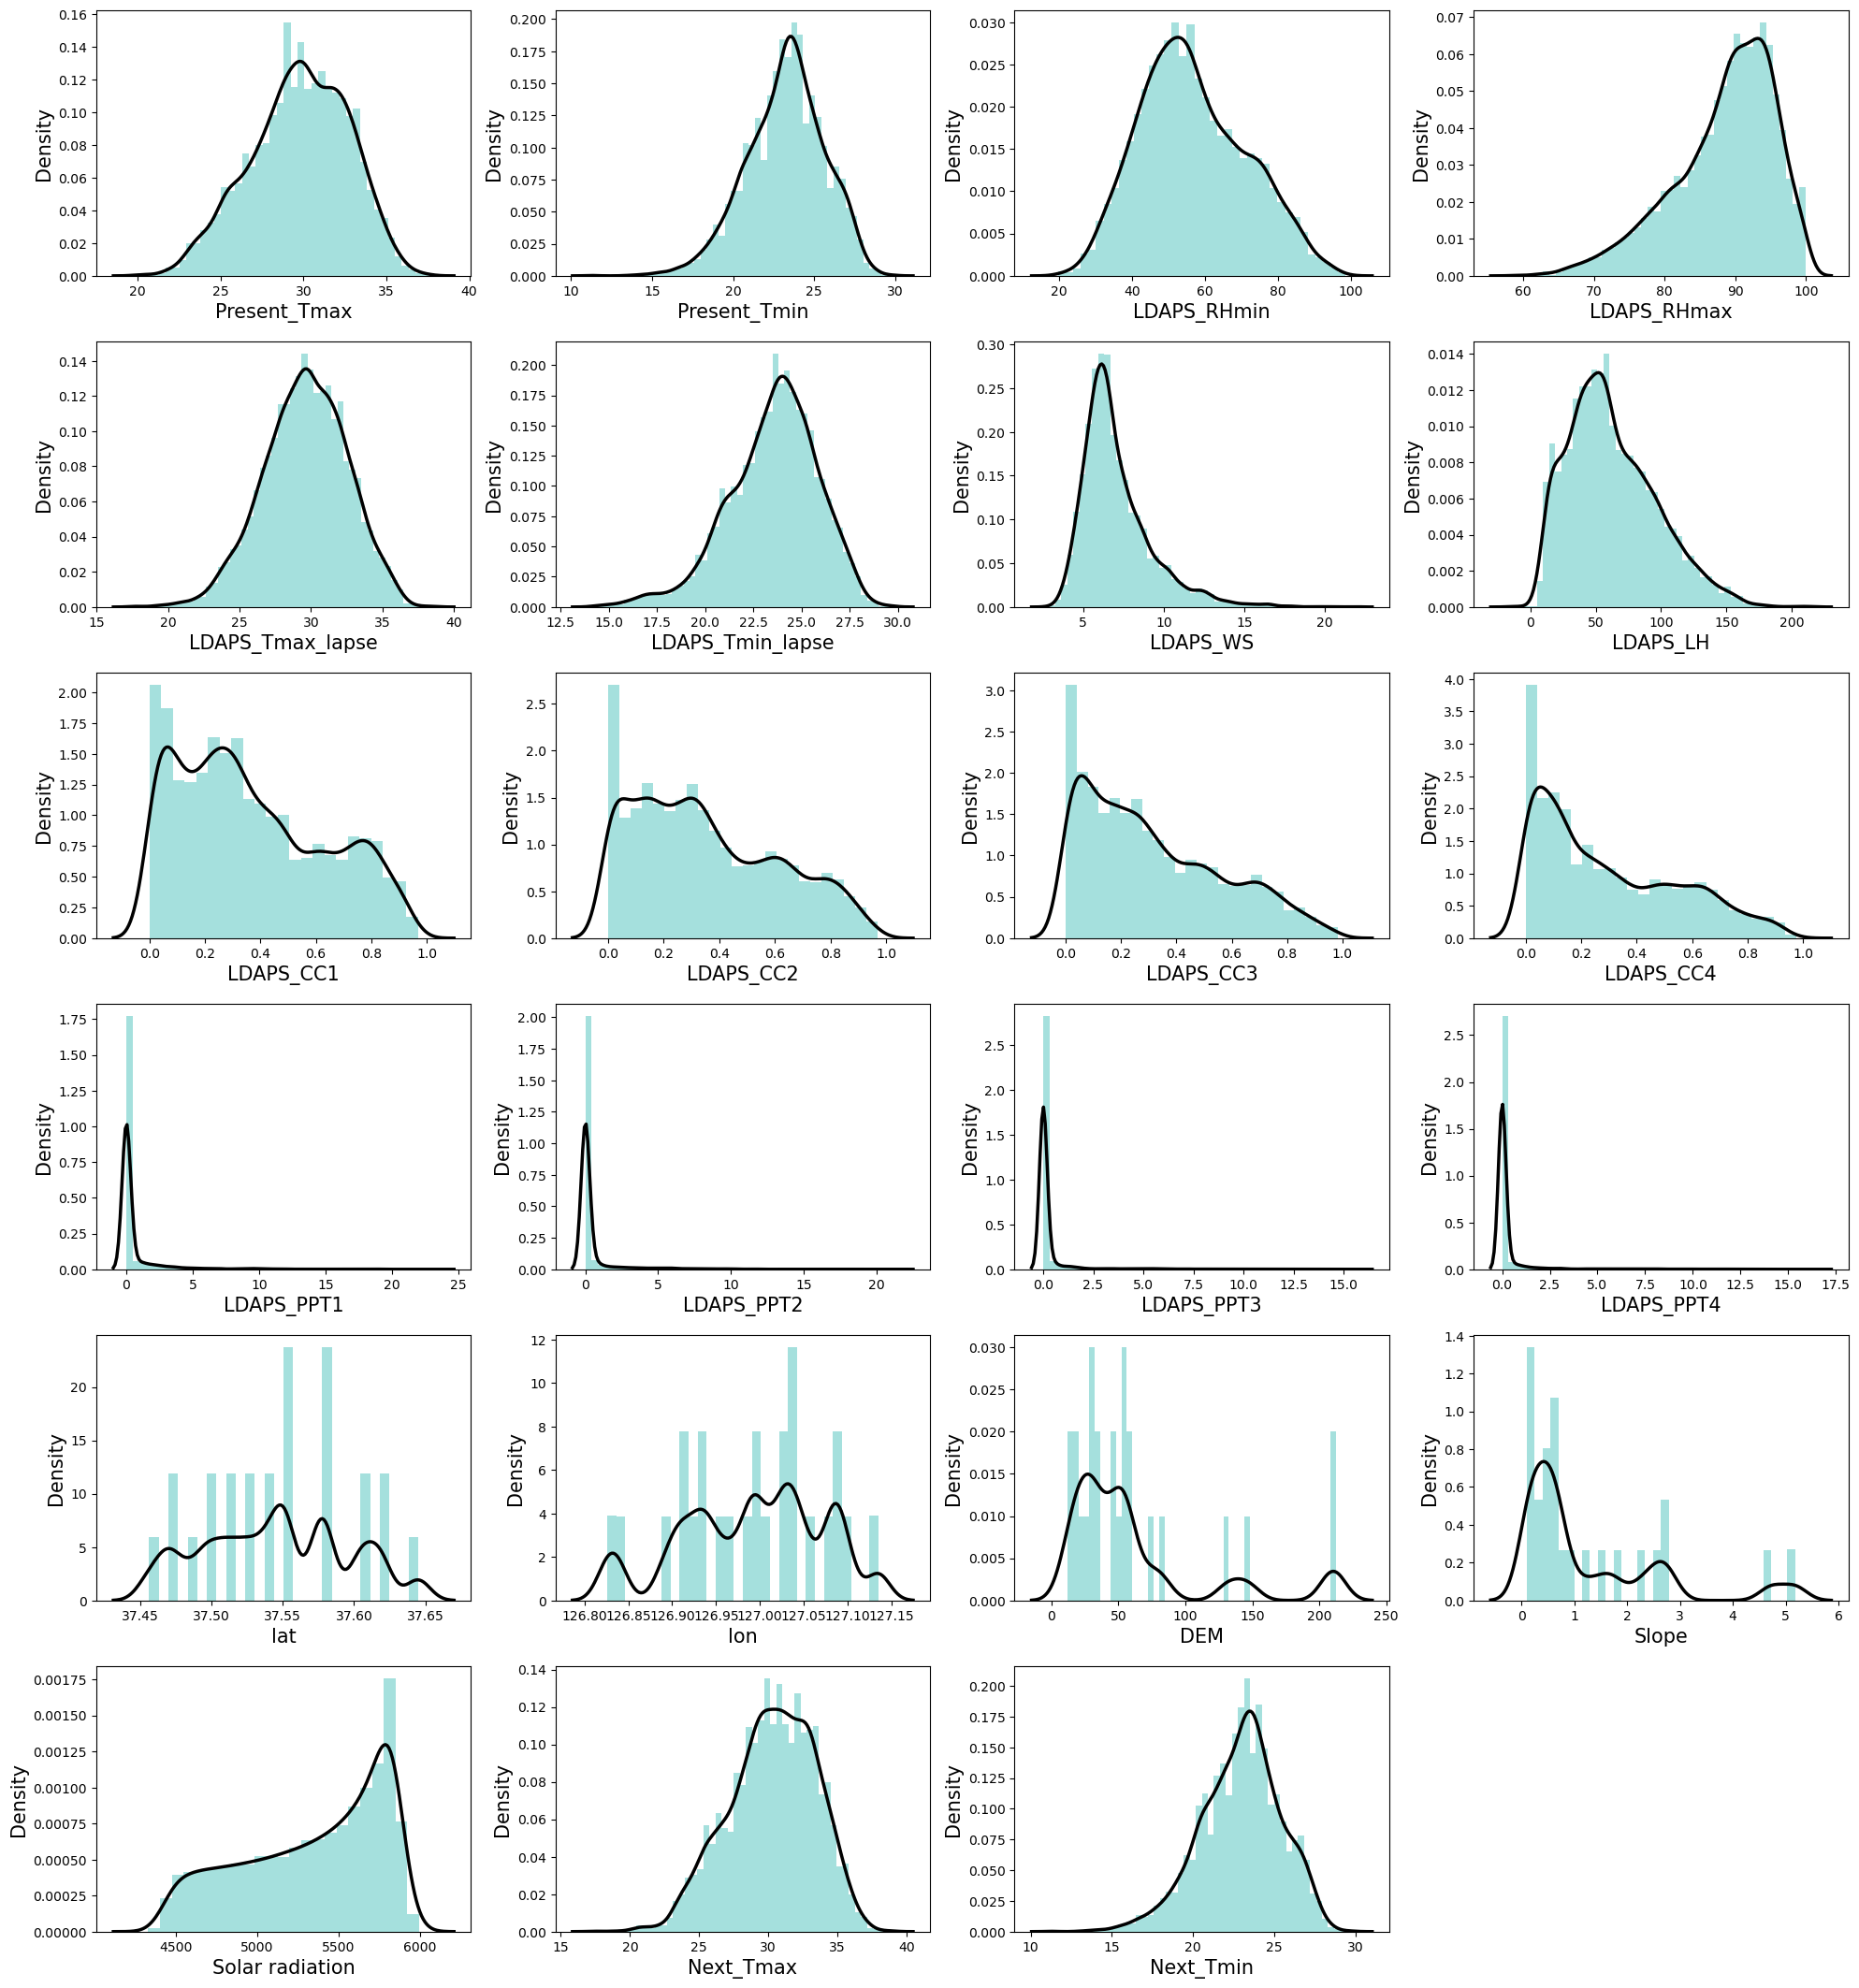

In [73]:
plt.figure(figsize=(20,35), facecolor='white')
plotnum= 1

for column in df.columns:
    if plotnum<=26:
        ax= plt.subplot(10,4, plotnum)
        sns.distplot(df[column], color='lightseagreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
        plt.xlabel(column, fontsize= 15)
        plt.ylabel('Density', fontsize= 15)
    plotnum+=1
plt.tight_layout()

Text(0, 0.5, 'Counts')

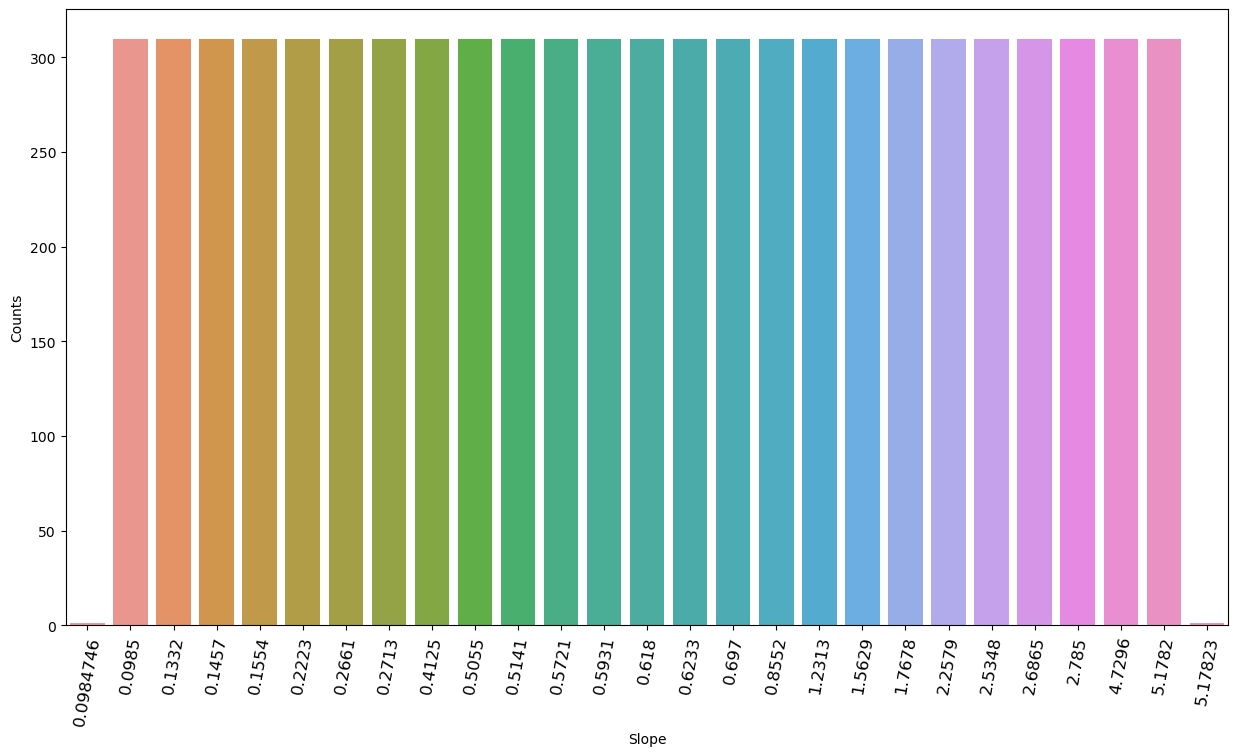

In [46]:
plt.figure(figsize=(15,8))
sns.countplot(x='Slope',data=df)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)
plt.ylabel('Counts')

Two slopes have one count each, all other slope values have equal counts.

Text(0, 0.5, 'Counts')

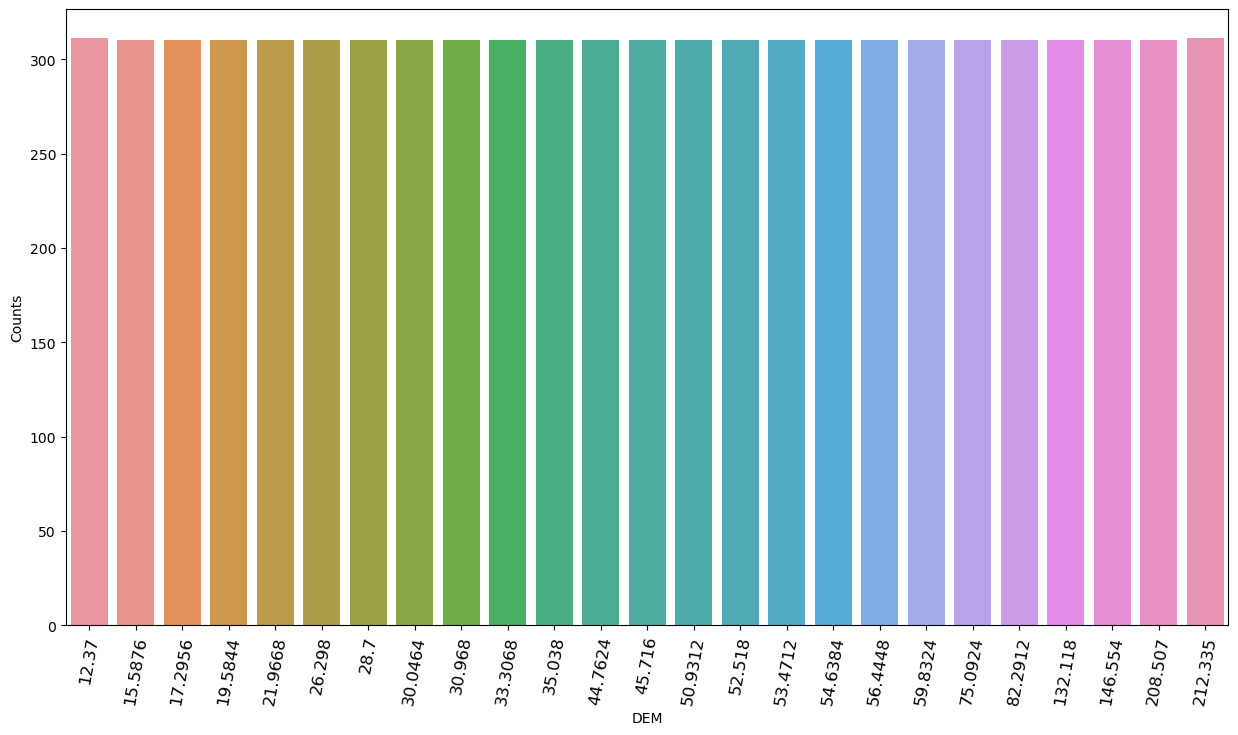

In [48]:
plt.figure(figsize=(15,8))
sns.countplot(x='DEM',data=df)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)
plt.ylabel('Counts')

1. All the elevations have same count as 310. 
2. All elevations have 311 counts each

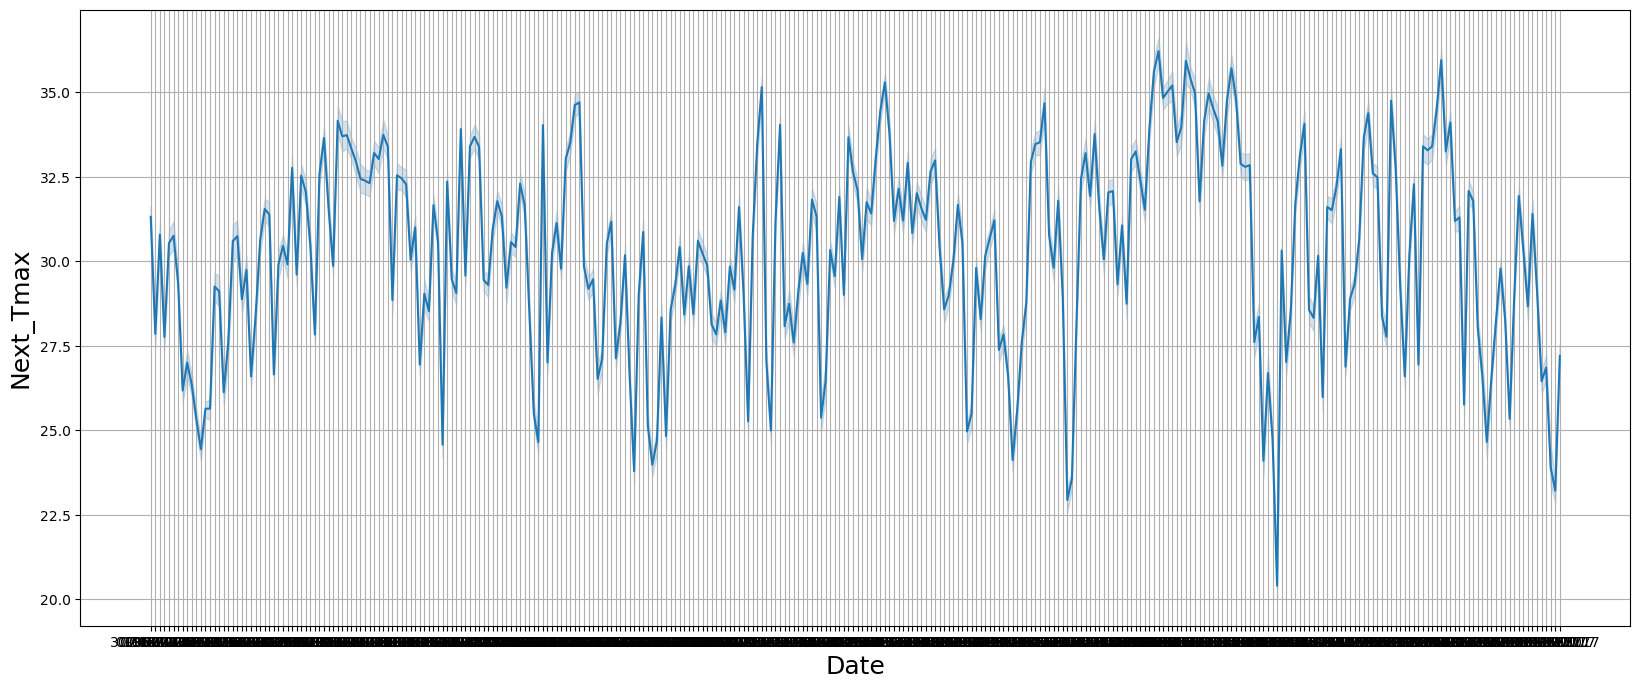

In [53]:
plt.figure(figsize=(20,8))
sns.lineplot(x='Date', y='Next_Tmax', data= df)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Next_Tmax', fontsize= 18)
plt.grid(True)
plt.show()

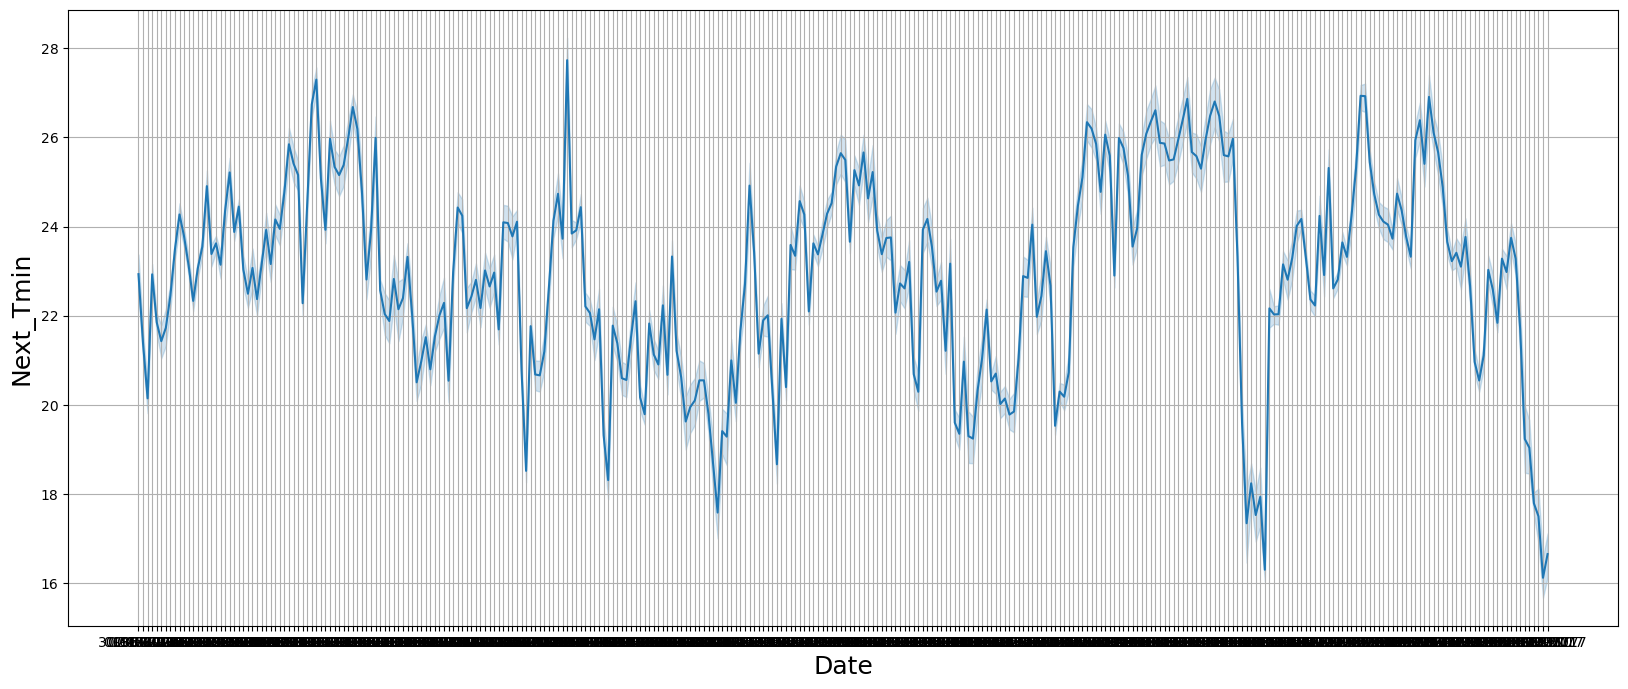

In [55]:
plt.figure(figsize=(20,8))
sns.lineplot(x='Date', y='Next_Tmin', data= df )
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Next_Tmin', fontsize= 18)
plt.grid(True)
plt.show()

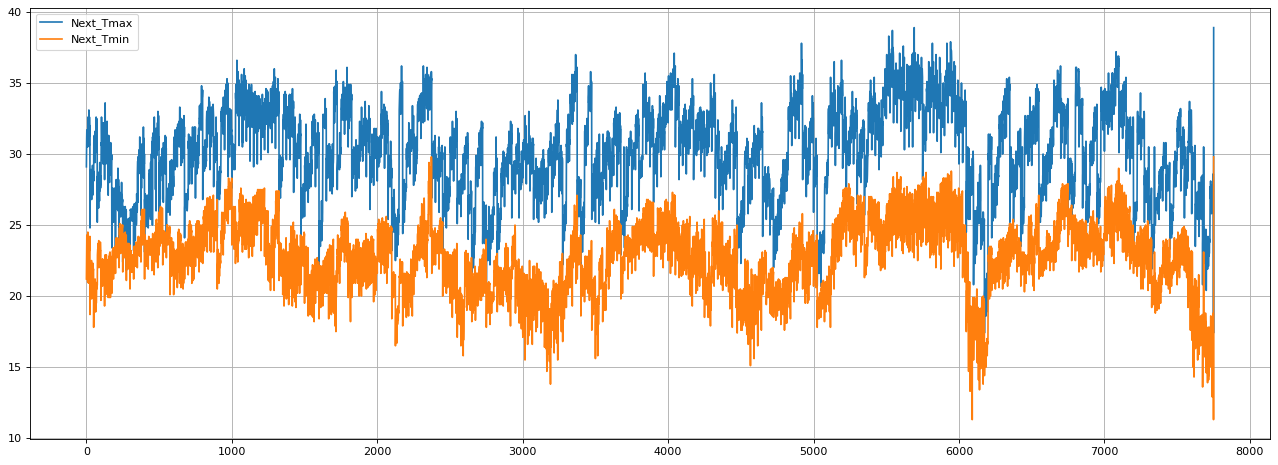

In [57]:
plt.figure(figsize=(20, 7), dpi=80)
plt.plot(df["Next_Tmax"],label="Next_Tmax")
plt.plot(df["Next_Tmin"],label="Next_Tmin")
plt.legend()
plt.grid(True)
plt.show()

<Axes: xlabel='station', ylabel='Next_Tmin'>

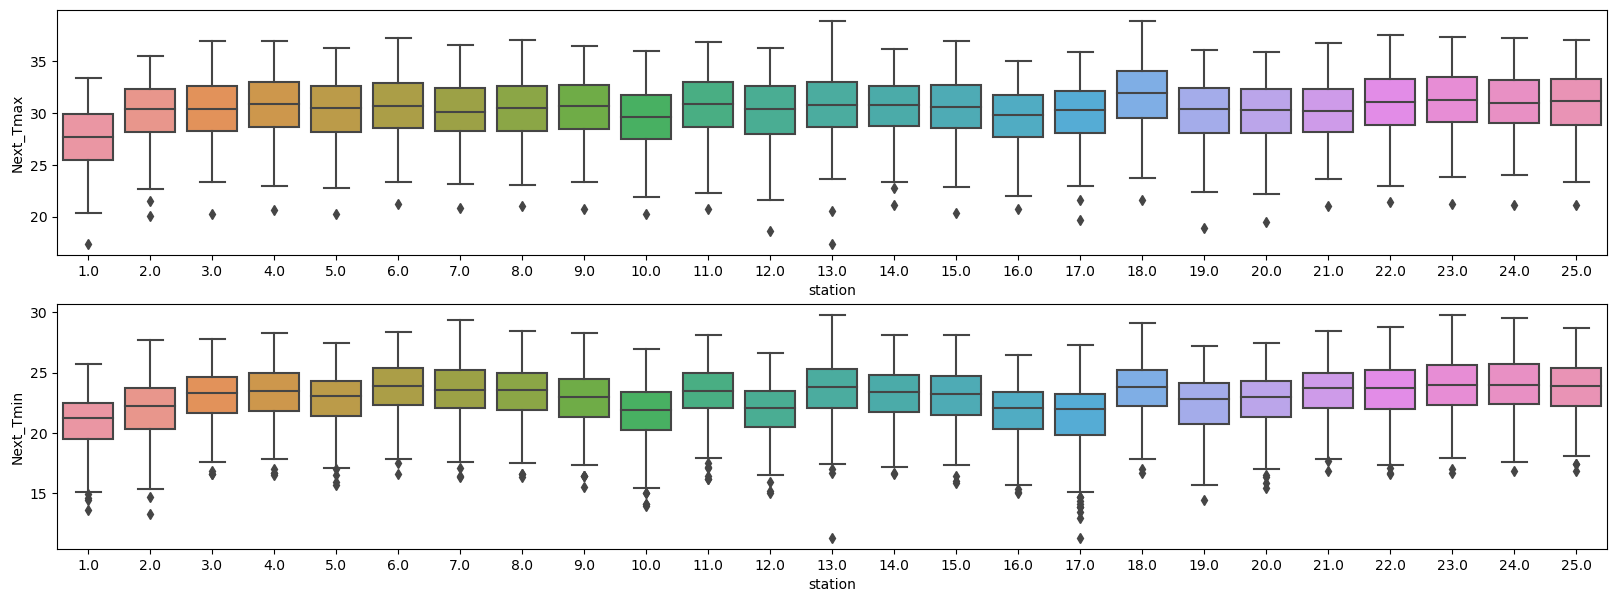

In [59]:
#Plotting wrt to station
plt.figure(figsize=(20,7))
plt.subplot(2,1,1)
sns.boxplot(x='station',y='Next_Tmax',data=df)

plt.subplot(2,1,2)
sns.boxplot(x='station',y='Next_Tmin',data=df)

Tmax and Tmin is maximum at station 18 and it's minimun at station 1

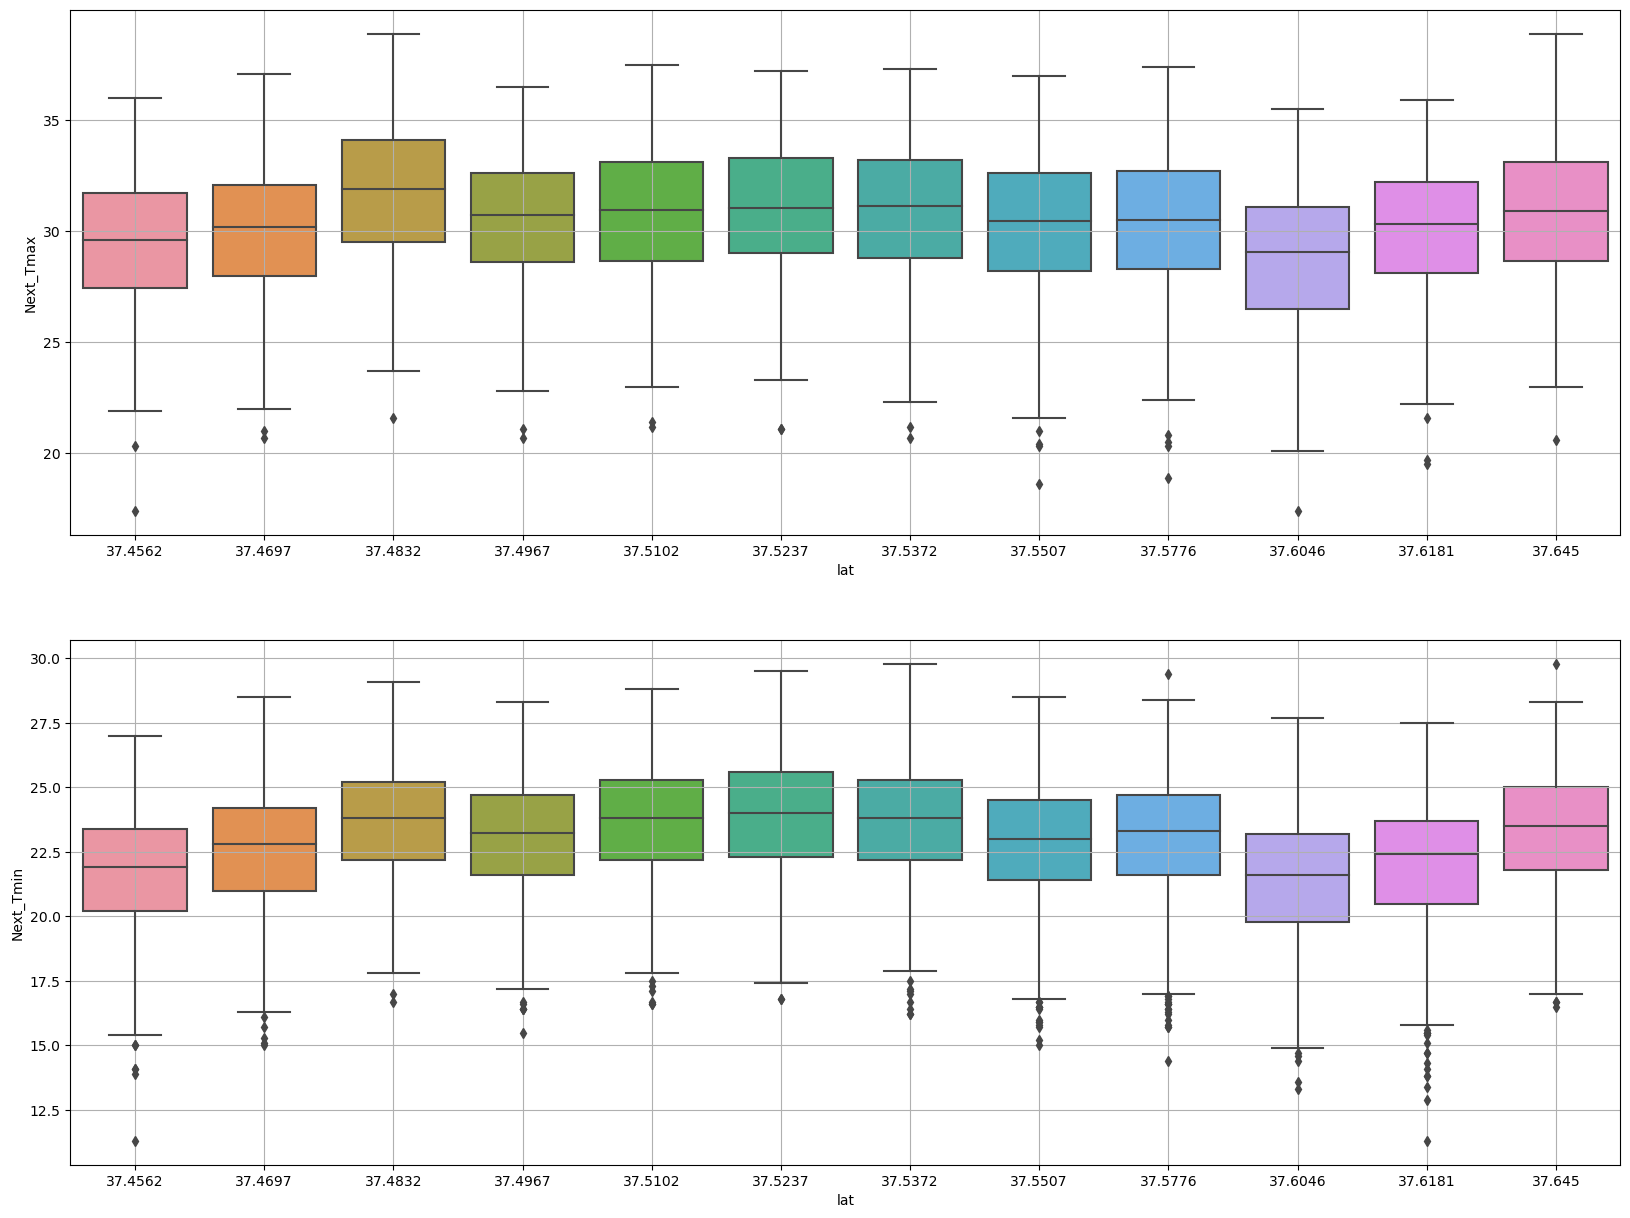

In [60]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.boxplot(x='lat',y='Next_Tmax',data=df)
plt.grid(True)
plt.subplot(2,1,2)
sns.boxplot(x='lat',y='Next_Tmin',data=df)
plt.grid(True)

Next_Tmax increases with the increase in the latitude and this is inverse for Next_Tmin

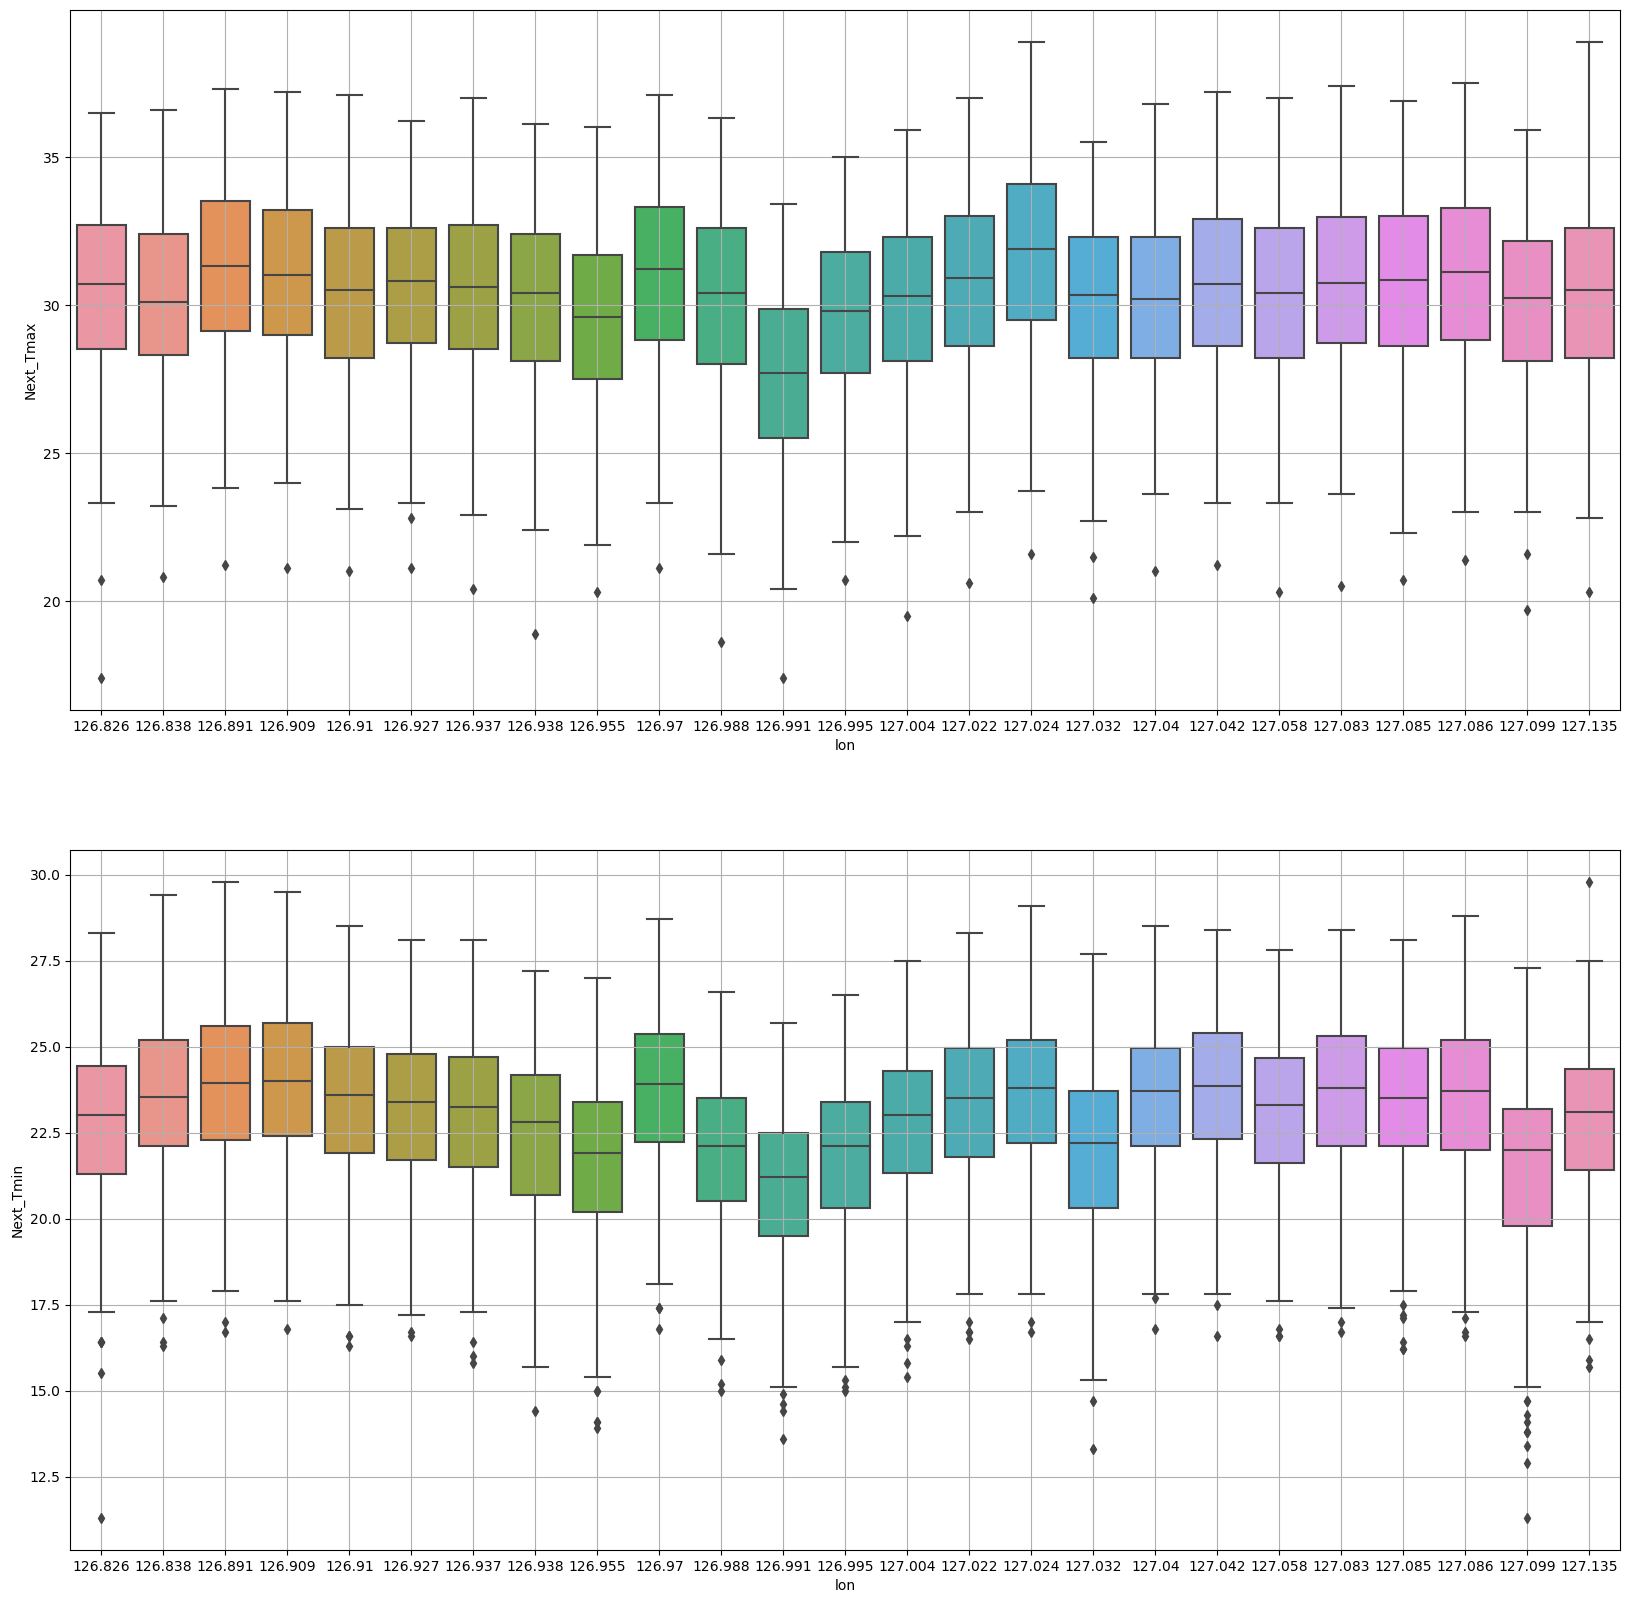

In [61]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
sns.boxplot(x='lon',y='Next_Tmax',data=df)
plt.grid(True)
plt.subplot(2,1,2)
sns.boxplot(x='lon',y='Next_Tmin',data=df)
plt.grid(True)

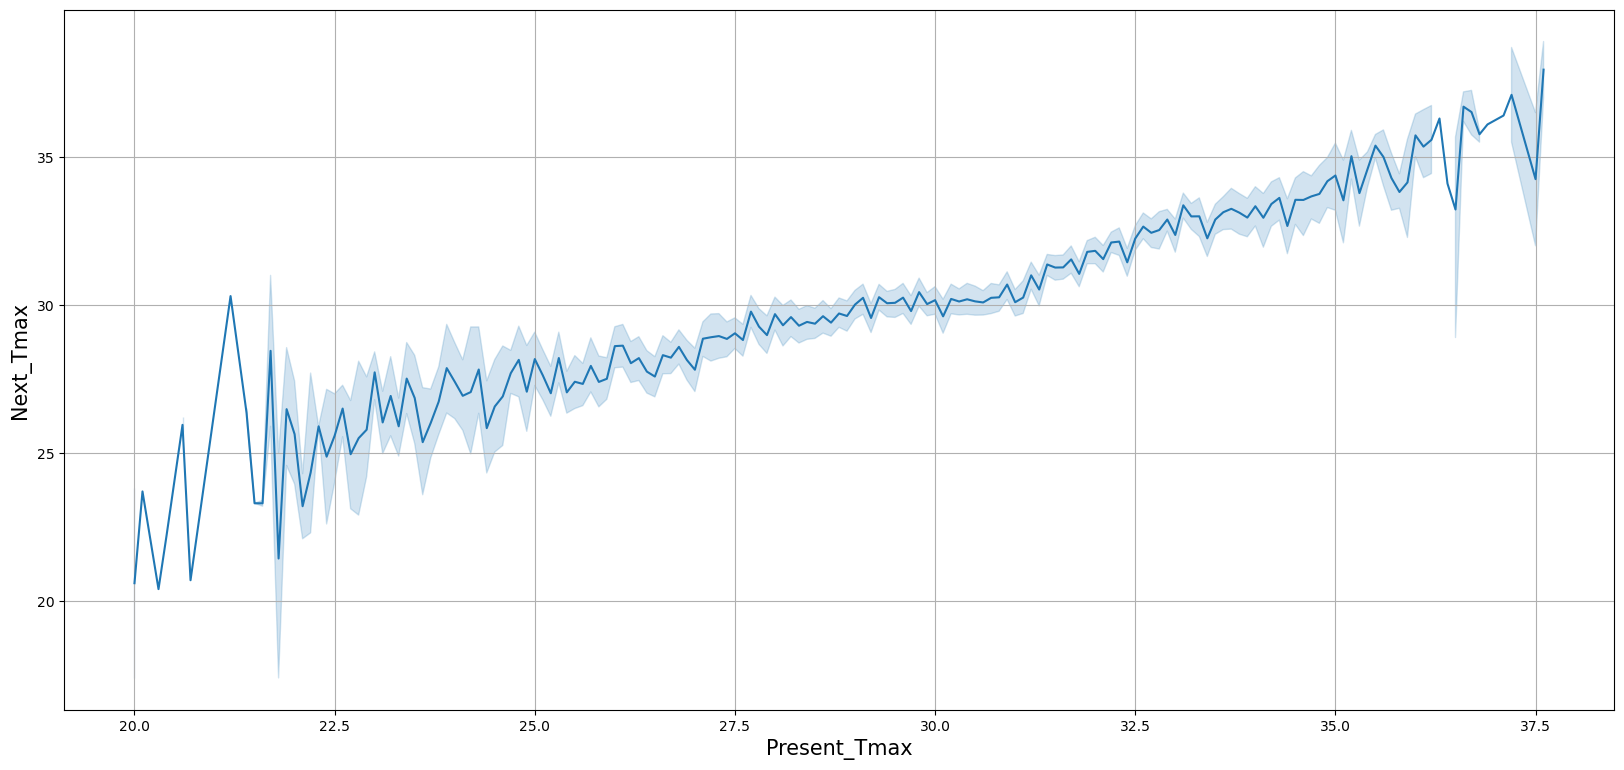

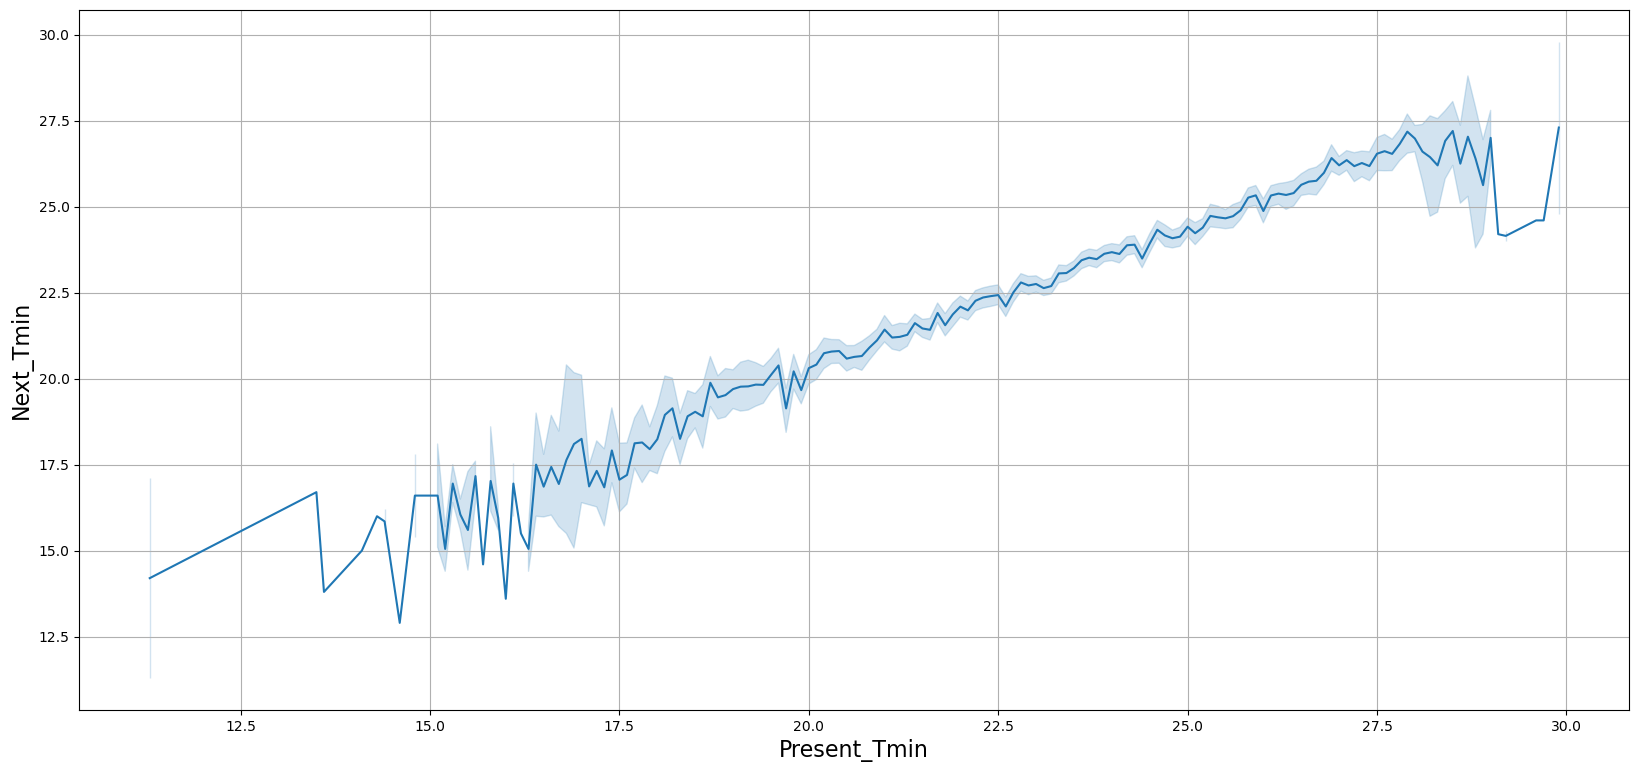

In [62]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
sns.lineplot(x='Present_Tmax', y='Next_Tmax', data= df )
plt.xlabel('Present_Tmax', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)
plt.grid(True)
plt.show()

plt.figure(figsize=(20,20))
plt.subplot(2,1,2)
sns.lineplot(x='Present_Tmin', y='Next_Tmin', data= df )
plt.xlabel('Present_Tmin', fontsize= 16)
plt.ylabel('Next_Tmin', fontsize= 16)
plt.grid(True)
plt.show()

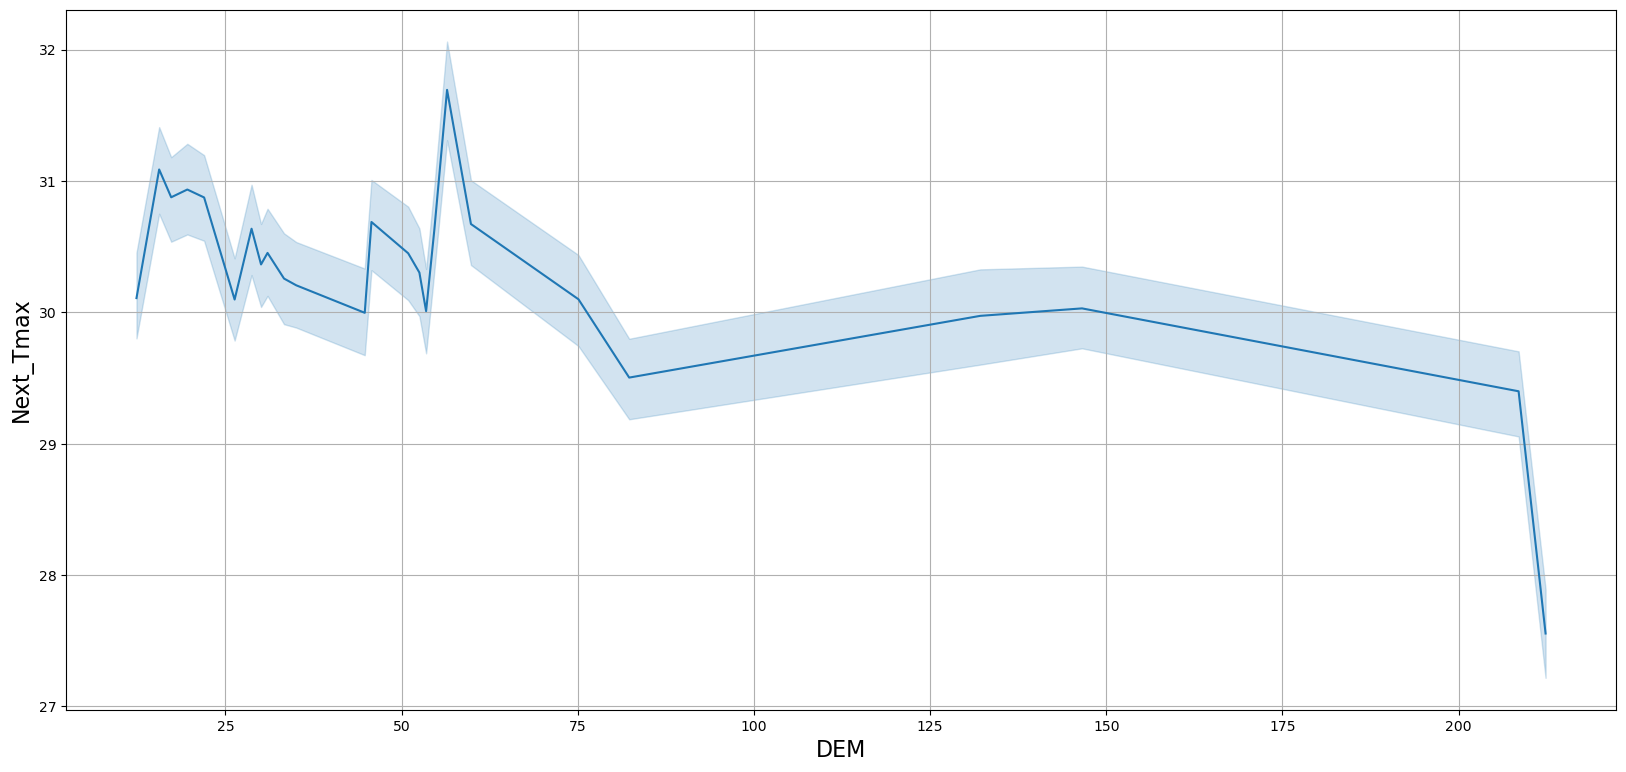

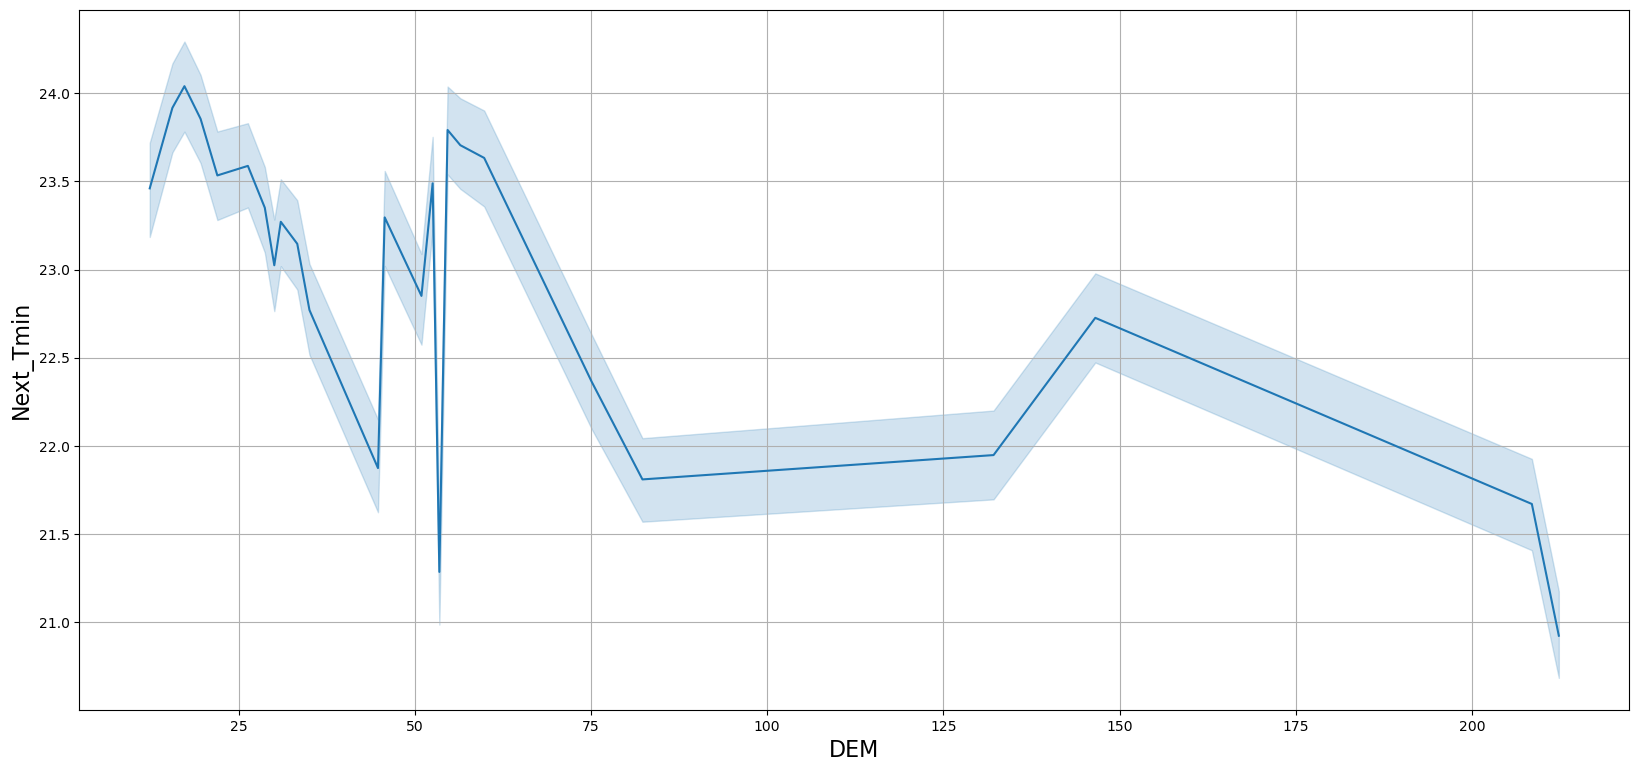

In [63]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
sns.lineplot(x='DEM', y='Next_Tmax', data= df)
plt.xlabel('DEM', fontsize= 16)
plt.ylabel('Next_Tmax', fontsize= 16)
plt.grid(True)
plt.show()

plt.figure(figsize=(20,20))
plt.subplot(2,1,2)
sns.lineplot(x='DEM', y='Next_Tmin', data= df)
plt.xlabel('DEM', fontsize= 16)
plt.ylabel('Next_Tmin', fontsize= 16)
plt.grid(True)
plt.show()

With an increase in the elevation there is decrease in the Next_Tmin and Next_Tmax.

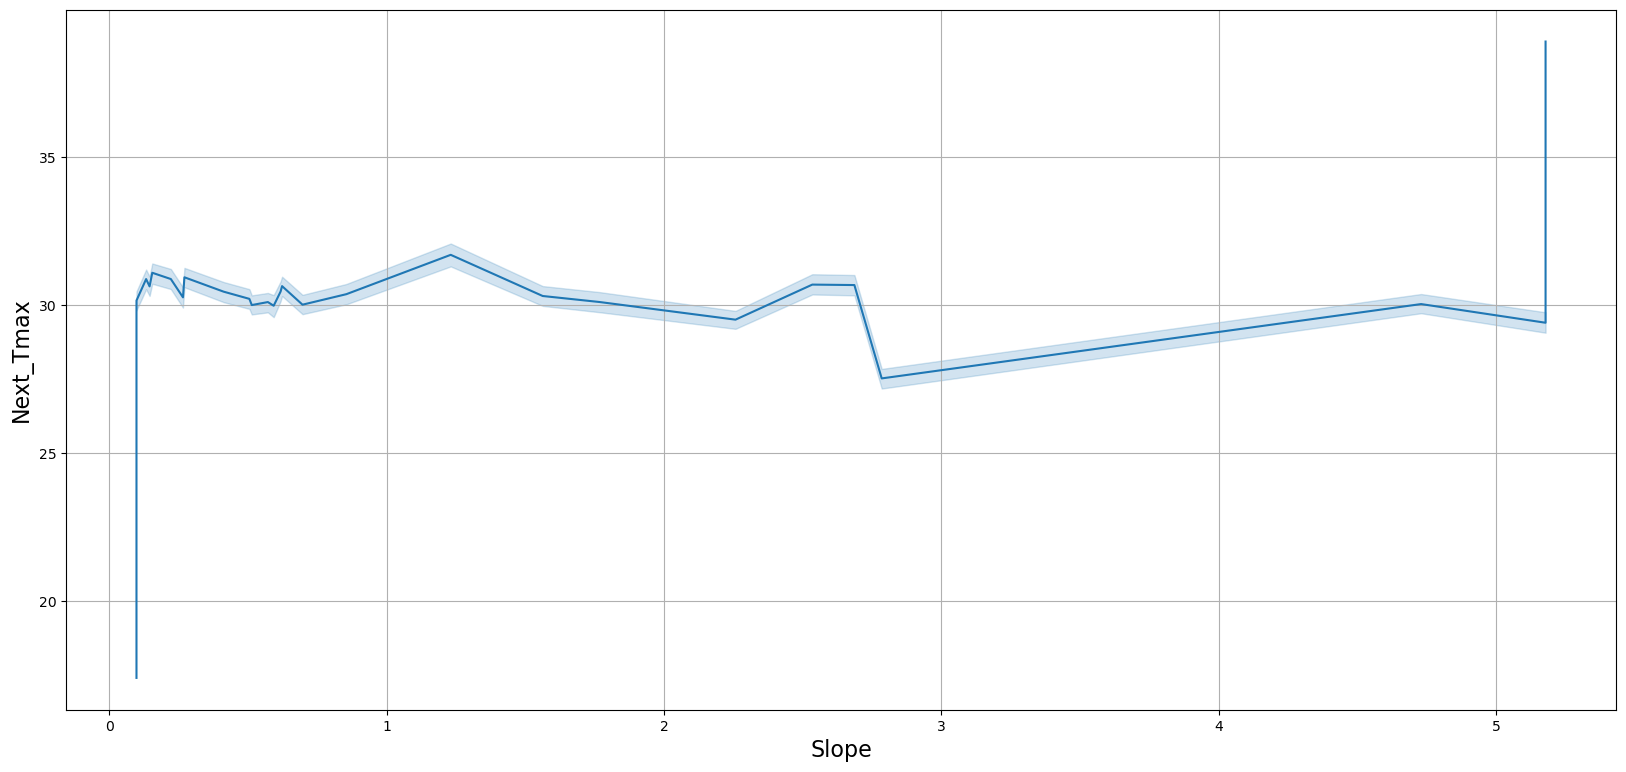

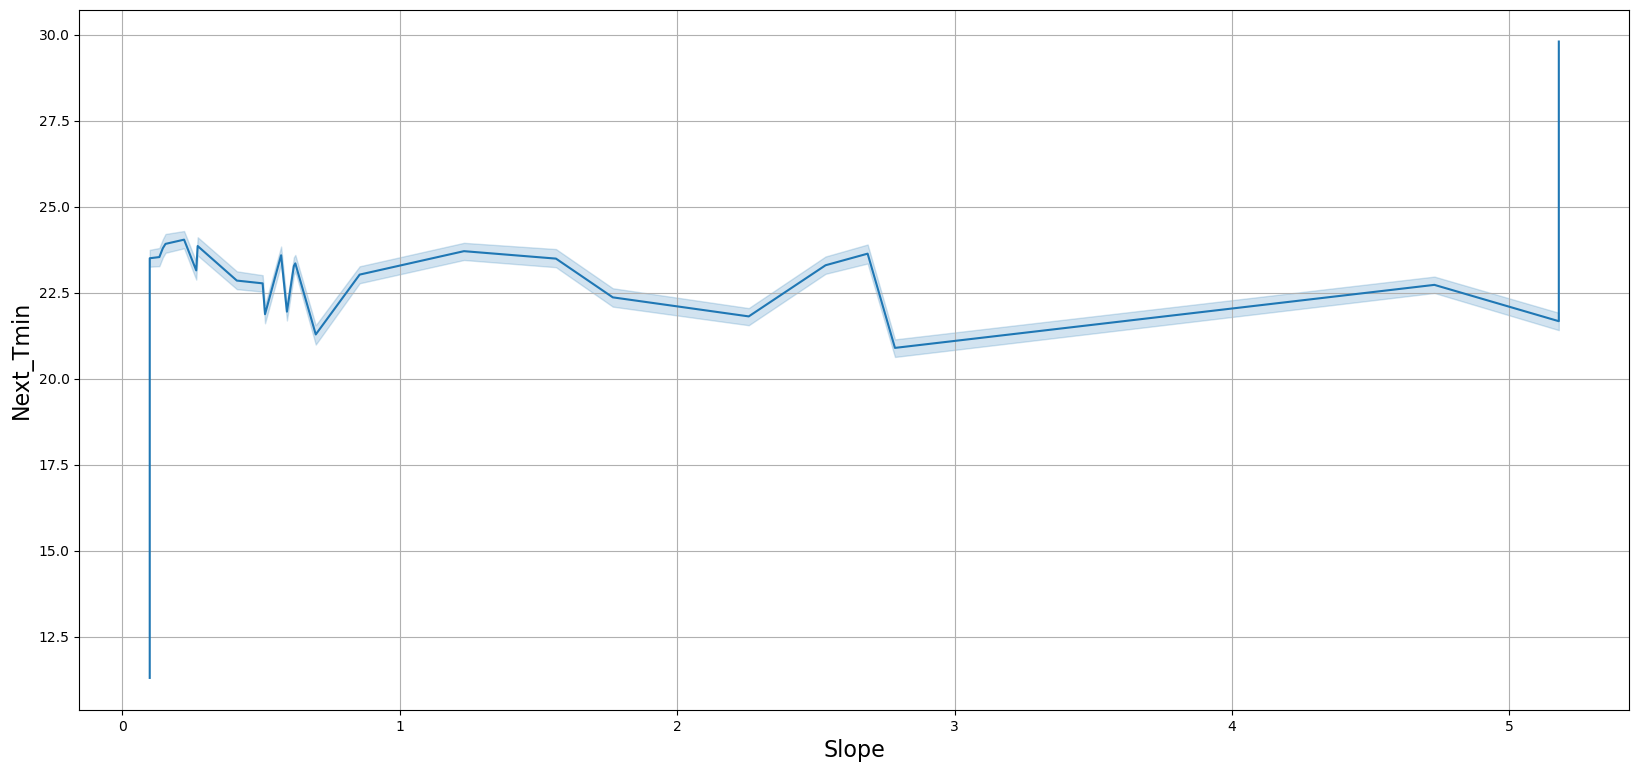

In [64]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
sns.lineplot(x='Slope', y='Next_Tmax', data= df)
plt.xlabel('Slope', fontsize= 16)
plt.ylabel('Next_Tmax', fontsize= 16)
plt.grid(True)
plt.show()

plt.figure(figsize=(20,20))
plt.subplot(2,1,2)
sns.lineplot(x='Slope', y='Next_Tmin', data= df)
plt.xlabel('Slope', fontsize= 16)
plt.ylabel('Next_Tmin', fontsize= 16)
plt.grid(True)
plt.show()

Both the Temperatures showing same relation.It is almost constant but after 5 it is increasing

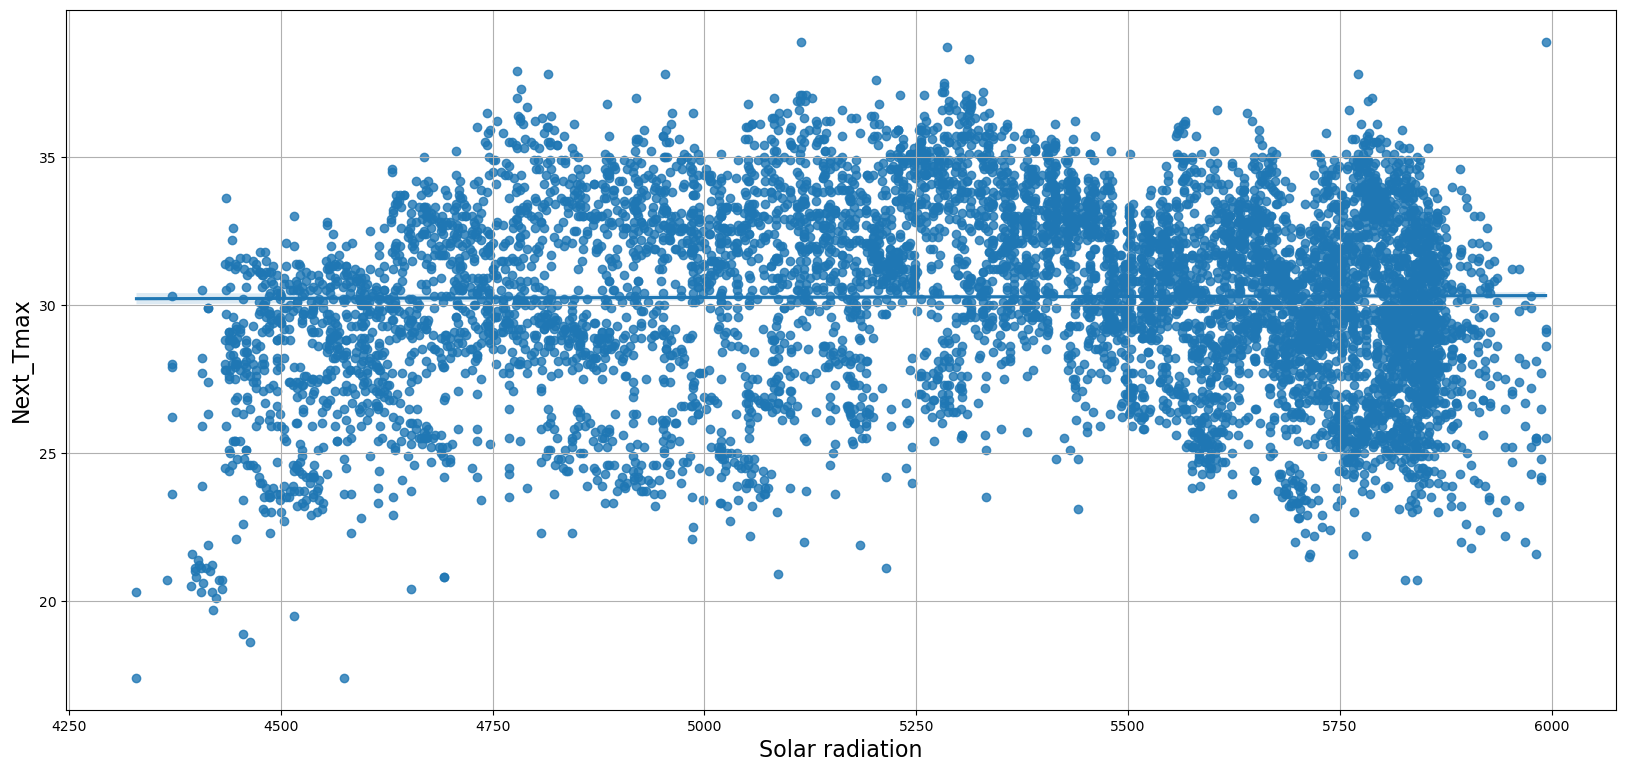

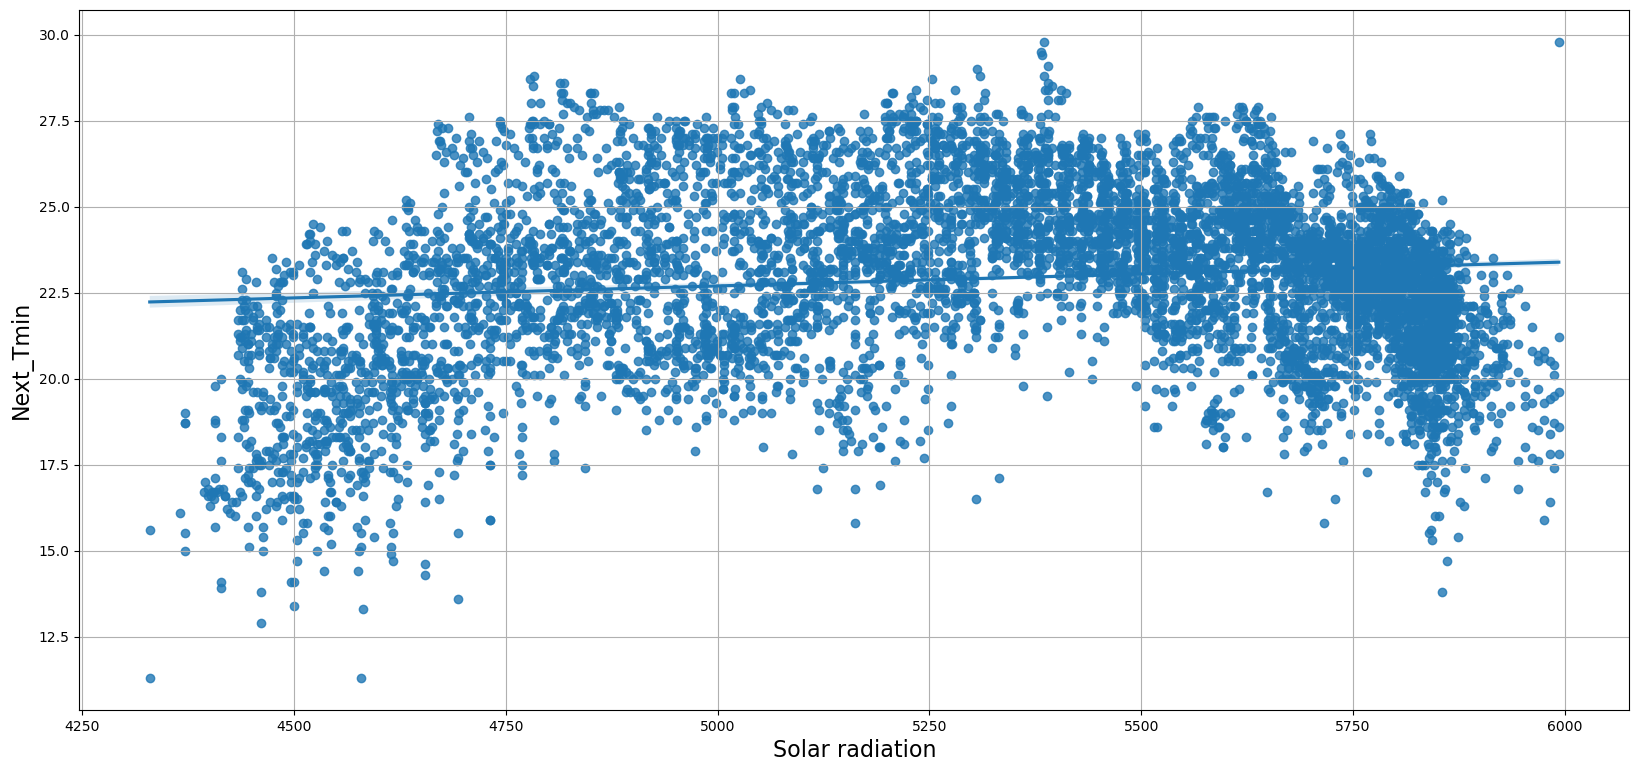

In [65]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
sns.regplot(x='Solar radiation', y='Next_Tmax', data= df)
plt.xlabel('Solar radiation', fontsize= 16)
plt.ylabel('Next_Tmax', fontsize= 16)
plt.grid(True)
plt.show()

plt.figure(figsize=(20,20))
plt.subplot(2,1,2)
sns.regplot(x='Solar radiation', y='Next_Tmin', data= df)
plt.xlabel('Solar radiation', fontsize= 16)
plt.ylabel('Next_Tmin', fontsize= 16)
plt.grid(True)
plt.show()

Relation between  solar radiation and temperature is seems to be strong but non linear relation

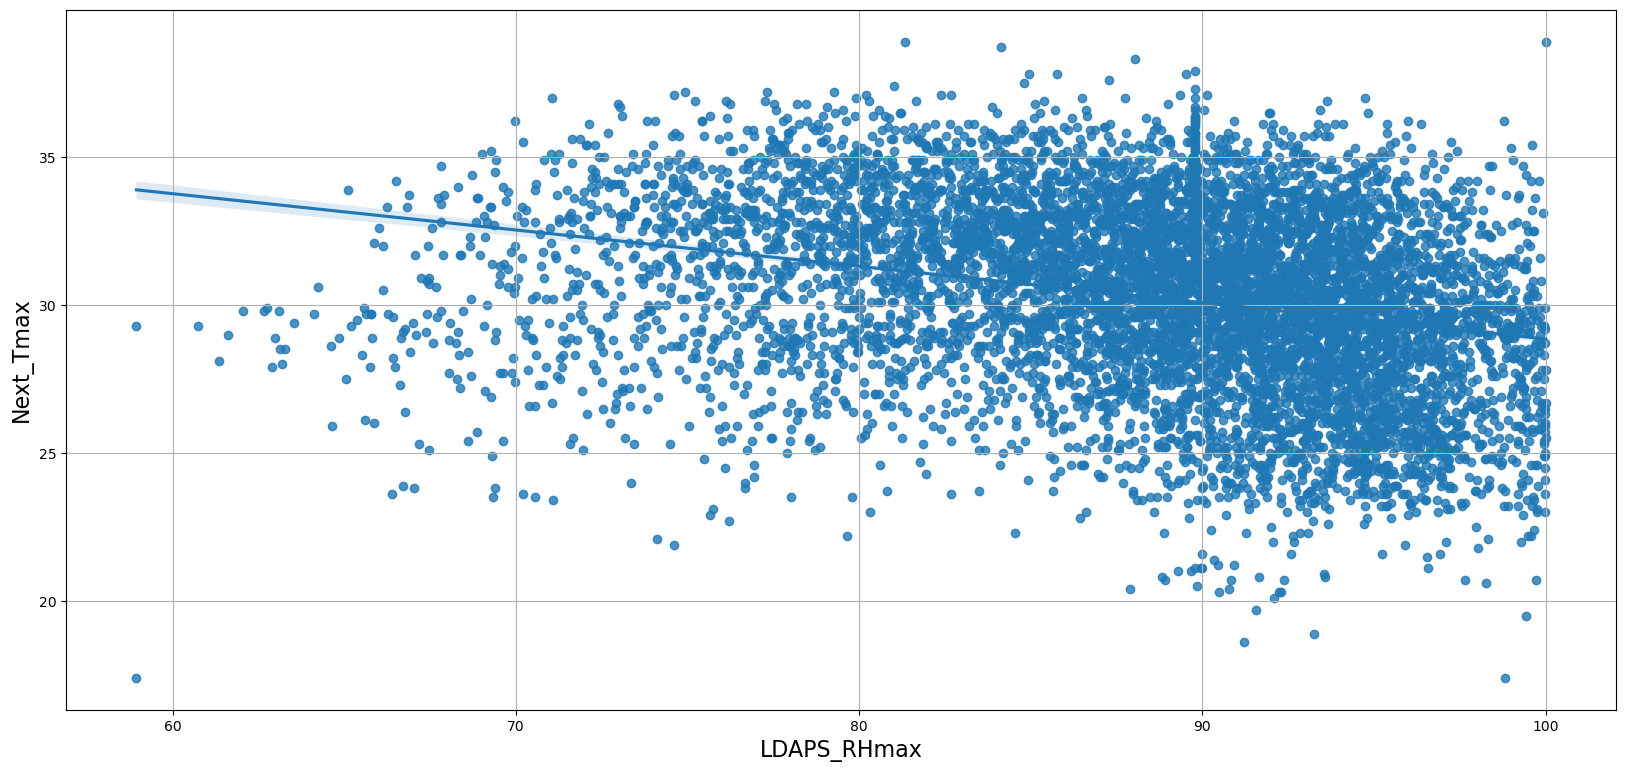

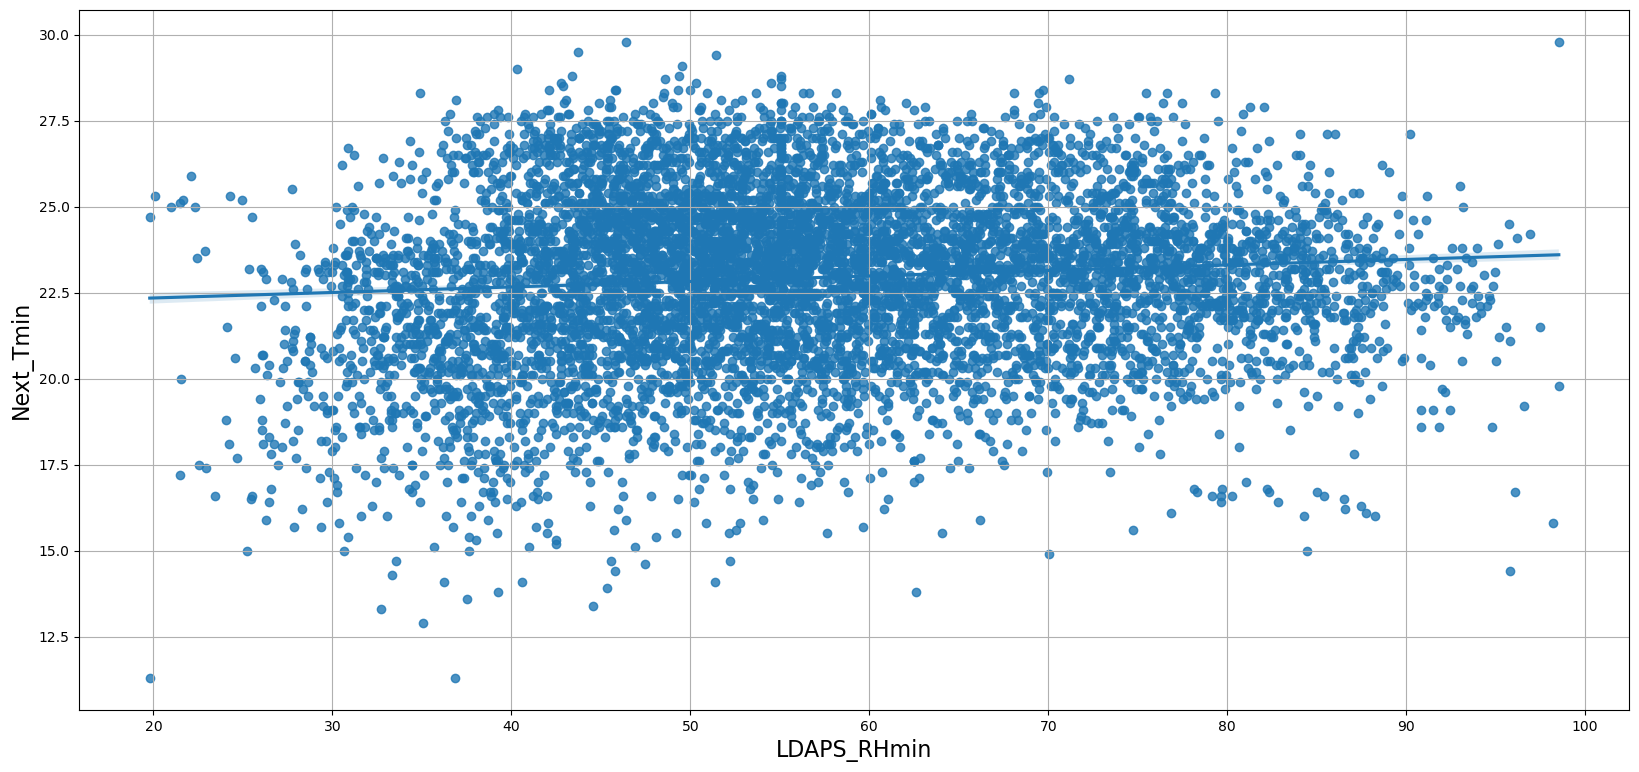

In [66]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
sns.regplot(x='LDAPS_RHmax', y='Next_Tmax', data= df)
plt.xlabel('LDAPS_RHmax', fontsize= 16)
plt.ylabel('Next_Tmax', fontsize= 16)
plt.grid(True)
plt.show()

plt.figure(figsize=(20,20))
plt.subplot(2,1,2)
sns.regplot(x='LDAPS_RHmin', y='Next_Tmin', data= df)
plt.xlabel('LDAPS_RHmin', fontsize= 16)
plt.ylabel('Next_Tmin', fontsize= 16)
plt.grid(True)
plt.show()

Moderately negative relationship 

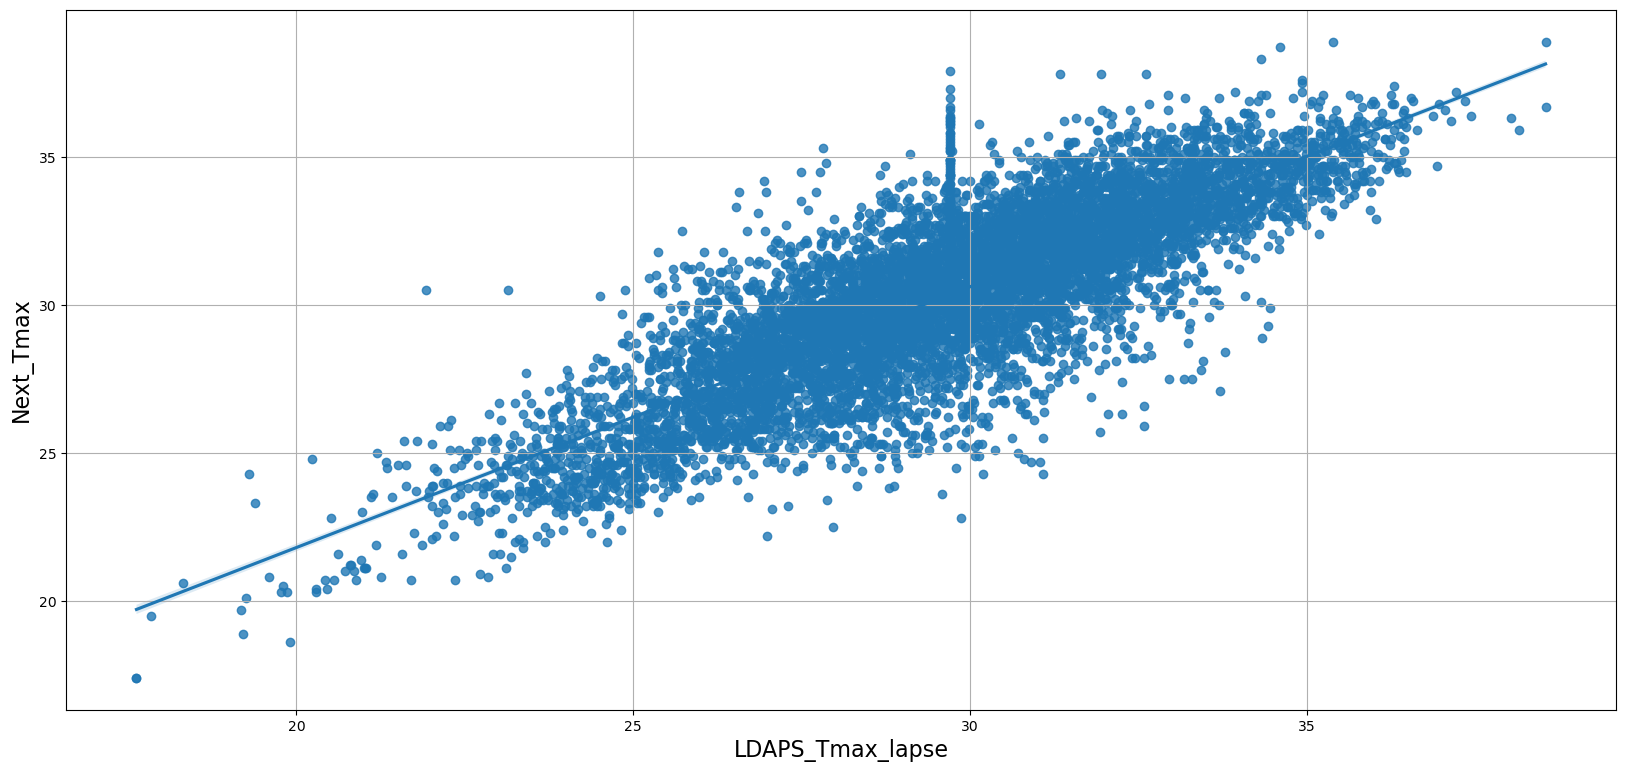

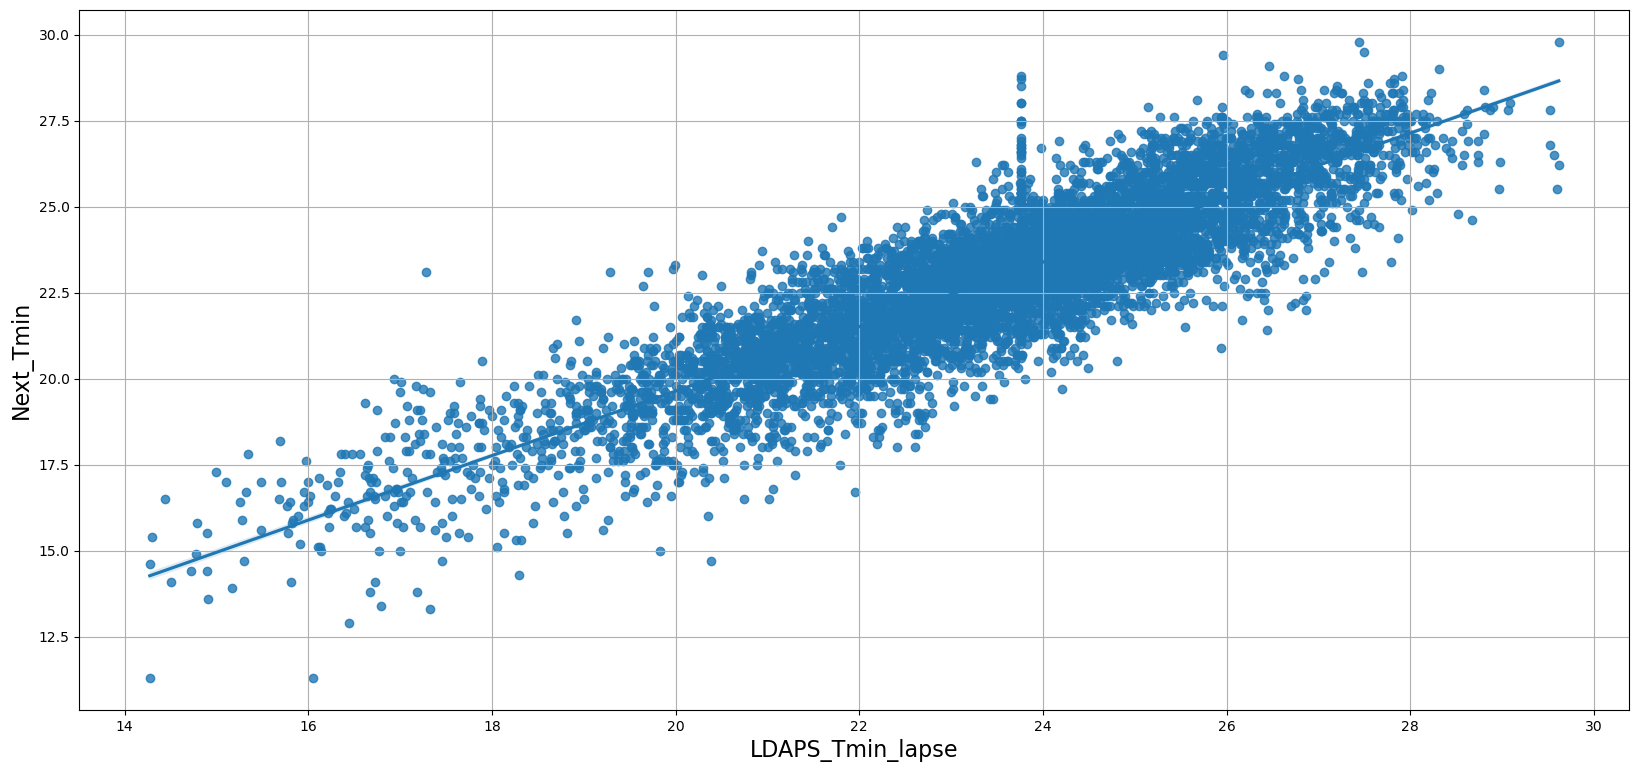

In [68]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
sns.regplot(x='LDAPS_Tmax_lapse', y='Next_Tmax', data= df)
plt.xlabel('LDAPS_Tmax_lapse', fontsize= 16)
plt.ylabel('Next_Tmax', fontsize= 16)
plt.grid(True)
plt.show()

plt.figure(figsize=(20,20))
plt.subplot(2,1,2)
sns.regplot(x='LDAPS_Tmin_lapse', y='Next_Tmin', data= df)
plt.xlabel('LDAPS_Tmin_lapse', fontsize= 16)
plt.ylabel('Next_Tmin', fontsize= 16)
plt.grid(True)
plt.show()

It can be seen that there is a strong positive relationship betweem Air_temperature and Next day temperature. 

Text(0, 0.5, 'Next_Tmin')

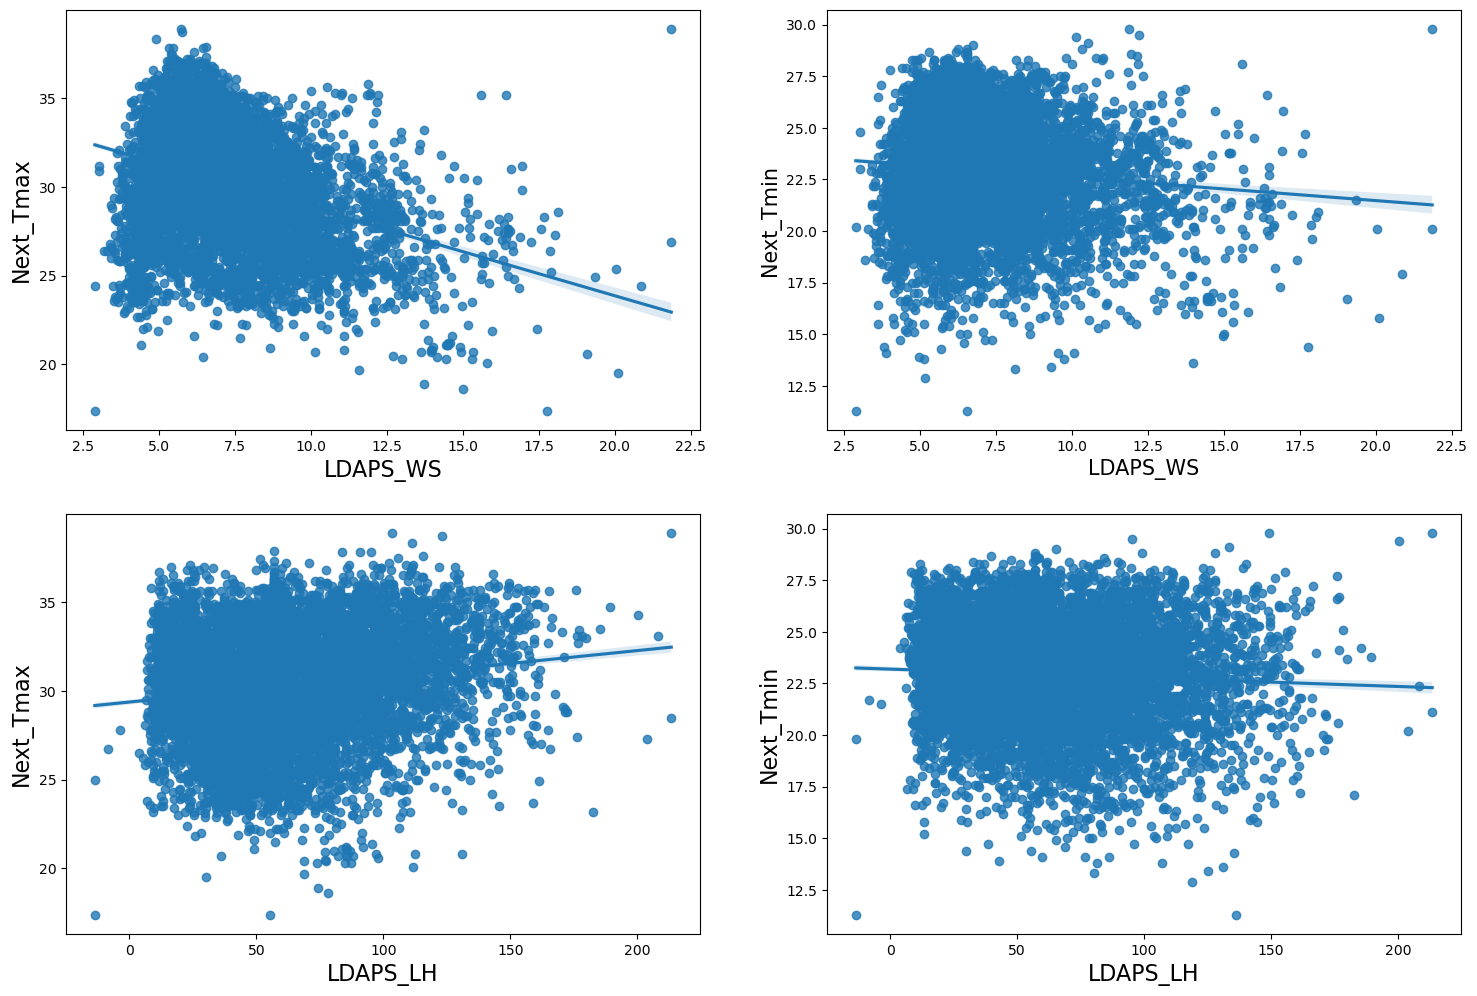

In [69]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
sns.regplot(x='LDAPS_WS', y='Next_Tmax', data= df)
plt.xlabel('LDAPS_WS', fontsize= 16)
plt.ylabel('Next_Tmax', fontsize= 16)


plt.subplot(2,2,2)
sns.regplot(x='LDAPS_WS', y='Next_Tmin', data= df)
plt.xlabel('LDAPS_WS', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)



plt.subplot(2,2,3)
sns.regplot(x='LDAPS_LH', y='Next_Tmax', data= df)
plt.xlabel('LDAPS_LH', fontsize= 16)
plt.ylabel('Next_Tmax', fontsize= 16)



plt.subplot(2,2,4)
sns.regplot(x='LDAPS_LH', y='Next_Tmin', data= df)
plt.xlabel('LDAPS_LH', fontsize= 16)
plt.ylabel('Next_Tmin', fontsize= 16)

1. Relationship between the latent heat and Next Day temperature. 
2. There is a decrease in the temperature with increase of latent heat.
3. In the last graph there is no relation with Latent heat and temperature.

Text(0, 0.5, 'Next_Tmin')

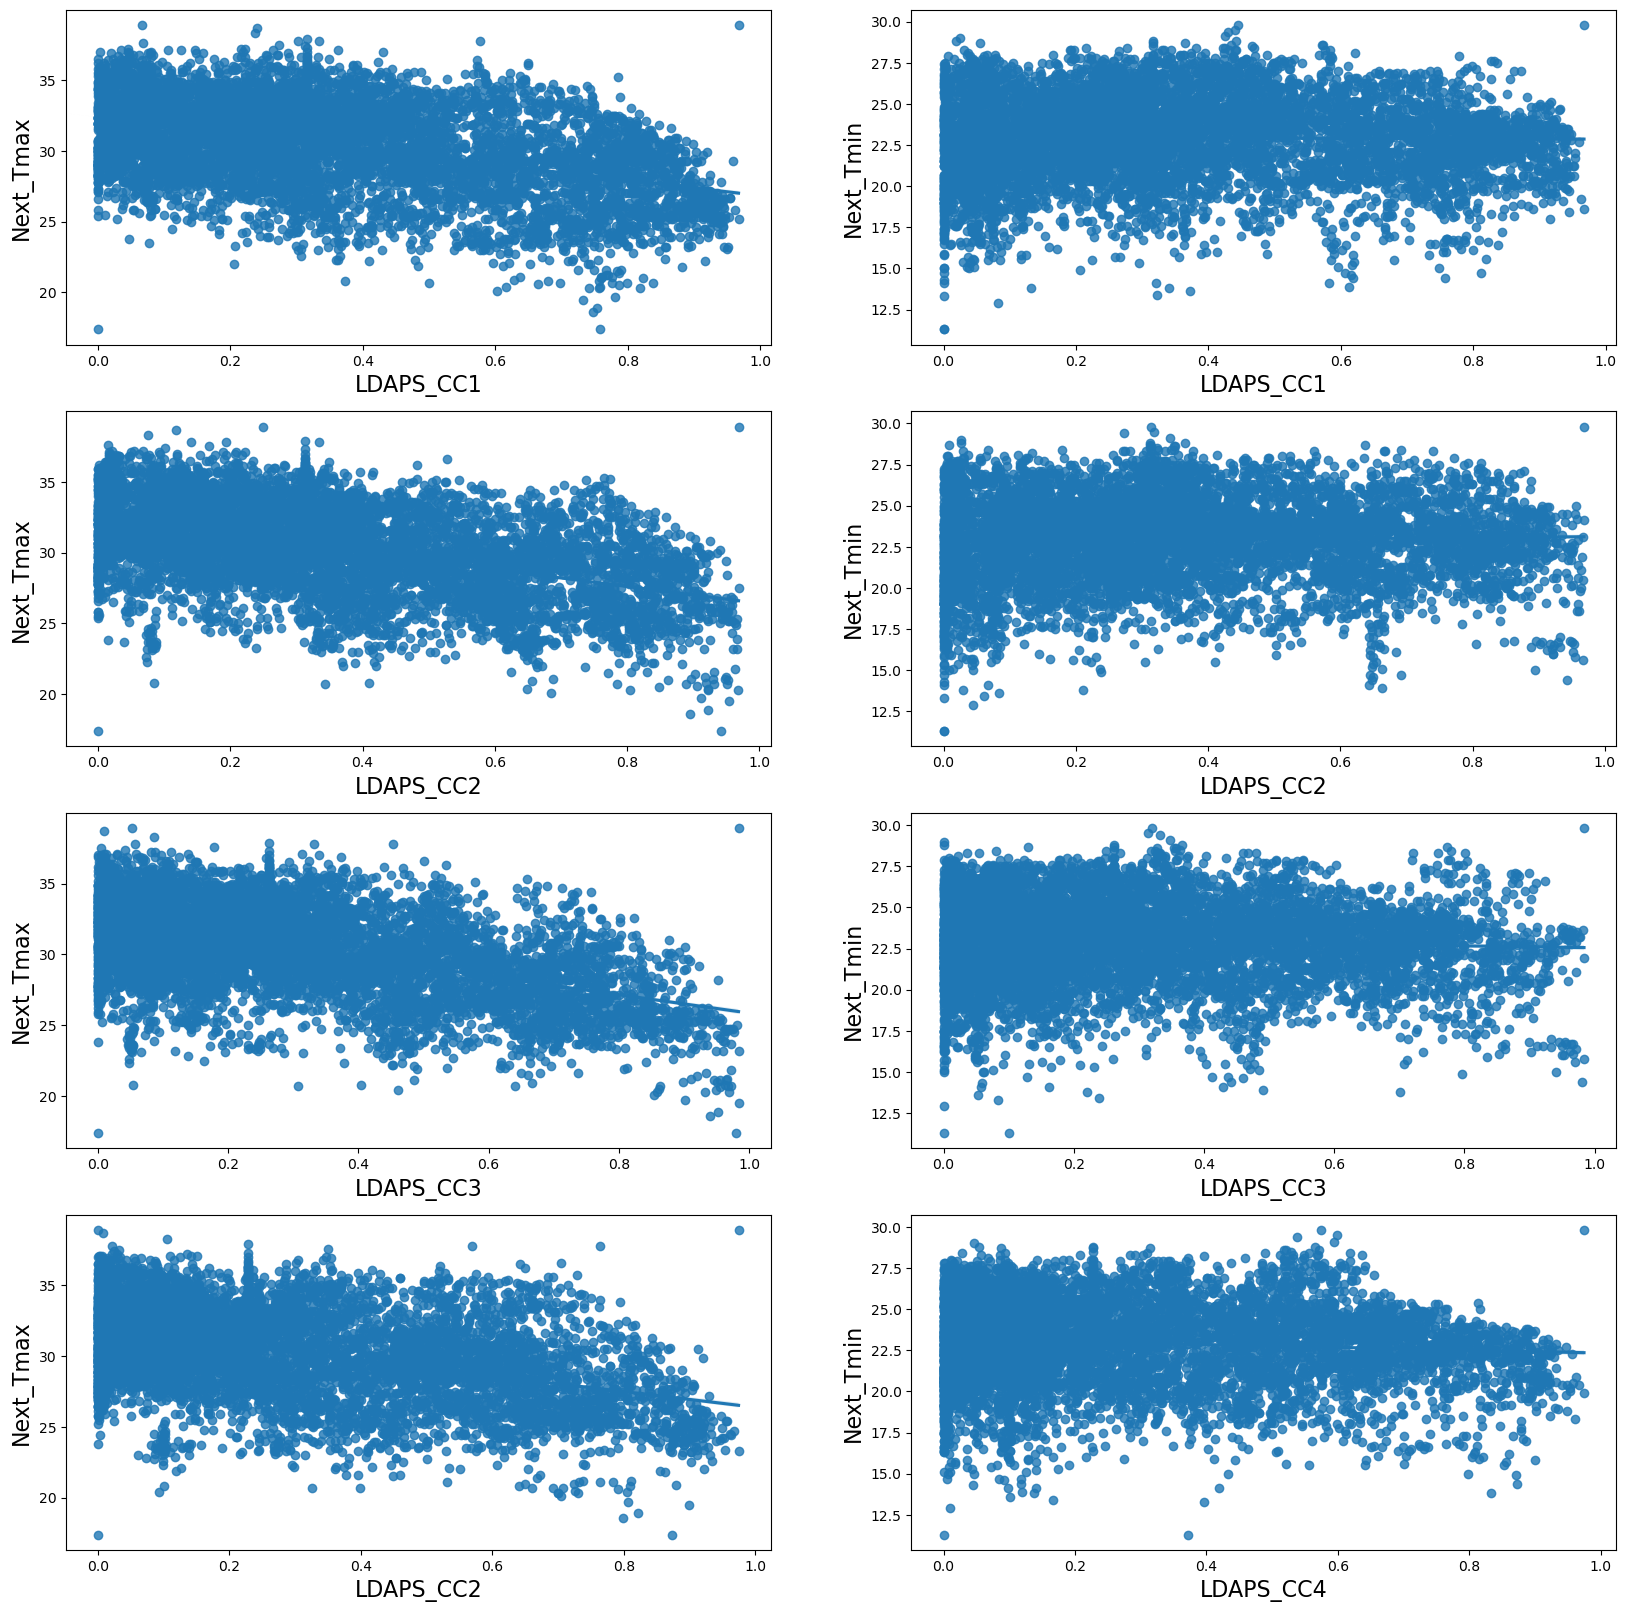

In [70]:
plt.figure(figsize=(20,20))

plt.subplot(4,2,1)
sns.regplot(x='LDAPS_CC1', y='Next_Tmax', data= df )
plt.xlabel('LDAPS_CC1', fontsize= 16)
plt.ylabel('Next_Tmax', fontsize= 16)


plt.subplot(4,2,2)
sns.regplot(x='LDAPS_CC1', y='Next_Tmin', data= df )
plt.xlabel('LDAPS_CC1', fontsize= 16)
plt.ylabel('Next_Tmin', fontsize= 16)



plt.subplot(4,2,3)
sns.regplot(x='LDAPS_CC2', y='Next_Tmax', data= df )
plt.xlabel('LDAPS_CC2', fontsize= 16)
plt.ylabel('Next_Tmax', fontsize= 16)



plt.subplot(4,2,4)
sns.regplot(x='LDAPS_CC2', y='Next_Tmin', data= df )
plt.xlabel('LDAPS_CC2', fontsize= 16)
plt.ylabel('Next_Tmin', fontsize= 16)


plt.subplot(4,2,5)
sns.regplot(x='LDAPS_CC3', y='Next_Tmax', data= df )
plt.xlabel('LDAPS_CC3', fontsize= 16)
plt.ylabel('Next_Tmax', fontsize= 16)

plt.subplot(4,2,6)
sns.regplot(x='LDAPS_CC3', y='Next_Tmin', data= df )
plt.xlabel('LDAPS_CC3', fontsize= 16)
plt.ylabel('Next_Tmin', fontsize= 16)



plt.subplot(4,2,7)
sns.regplot(x='LDAPS_CC4', y='Next_Tmax', data= df )
plt.xlabel('LDAPS_CC2', fontsize= 16)
plt.ylabel('Next_Tmax', fontsize= 16)



plt.subplot(4,2,8)
sns.regplot(x='LDAPS_CC4', y='Next_Tmin', data= df )
plt.xlabel('LDAPS_CC4', fontsize= 16)
plt.ylabel('Next_Tmin', fontsize= 16)

1. Graphs doesnot show good relation between split average cloud cover and Next day temperature. 
2. There is a negative relation in few plots

Text(0, 0.5, 'Next_Tmin')

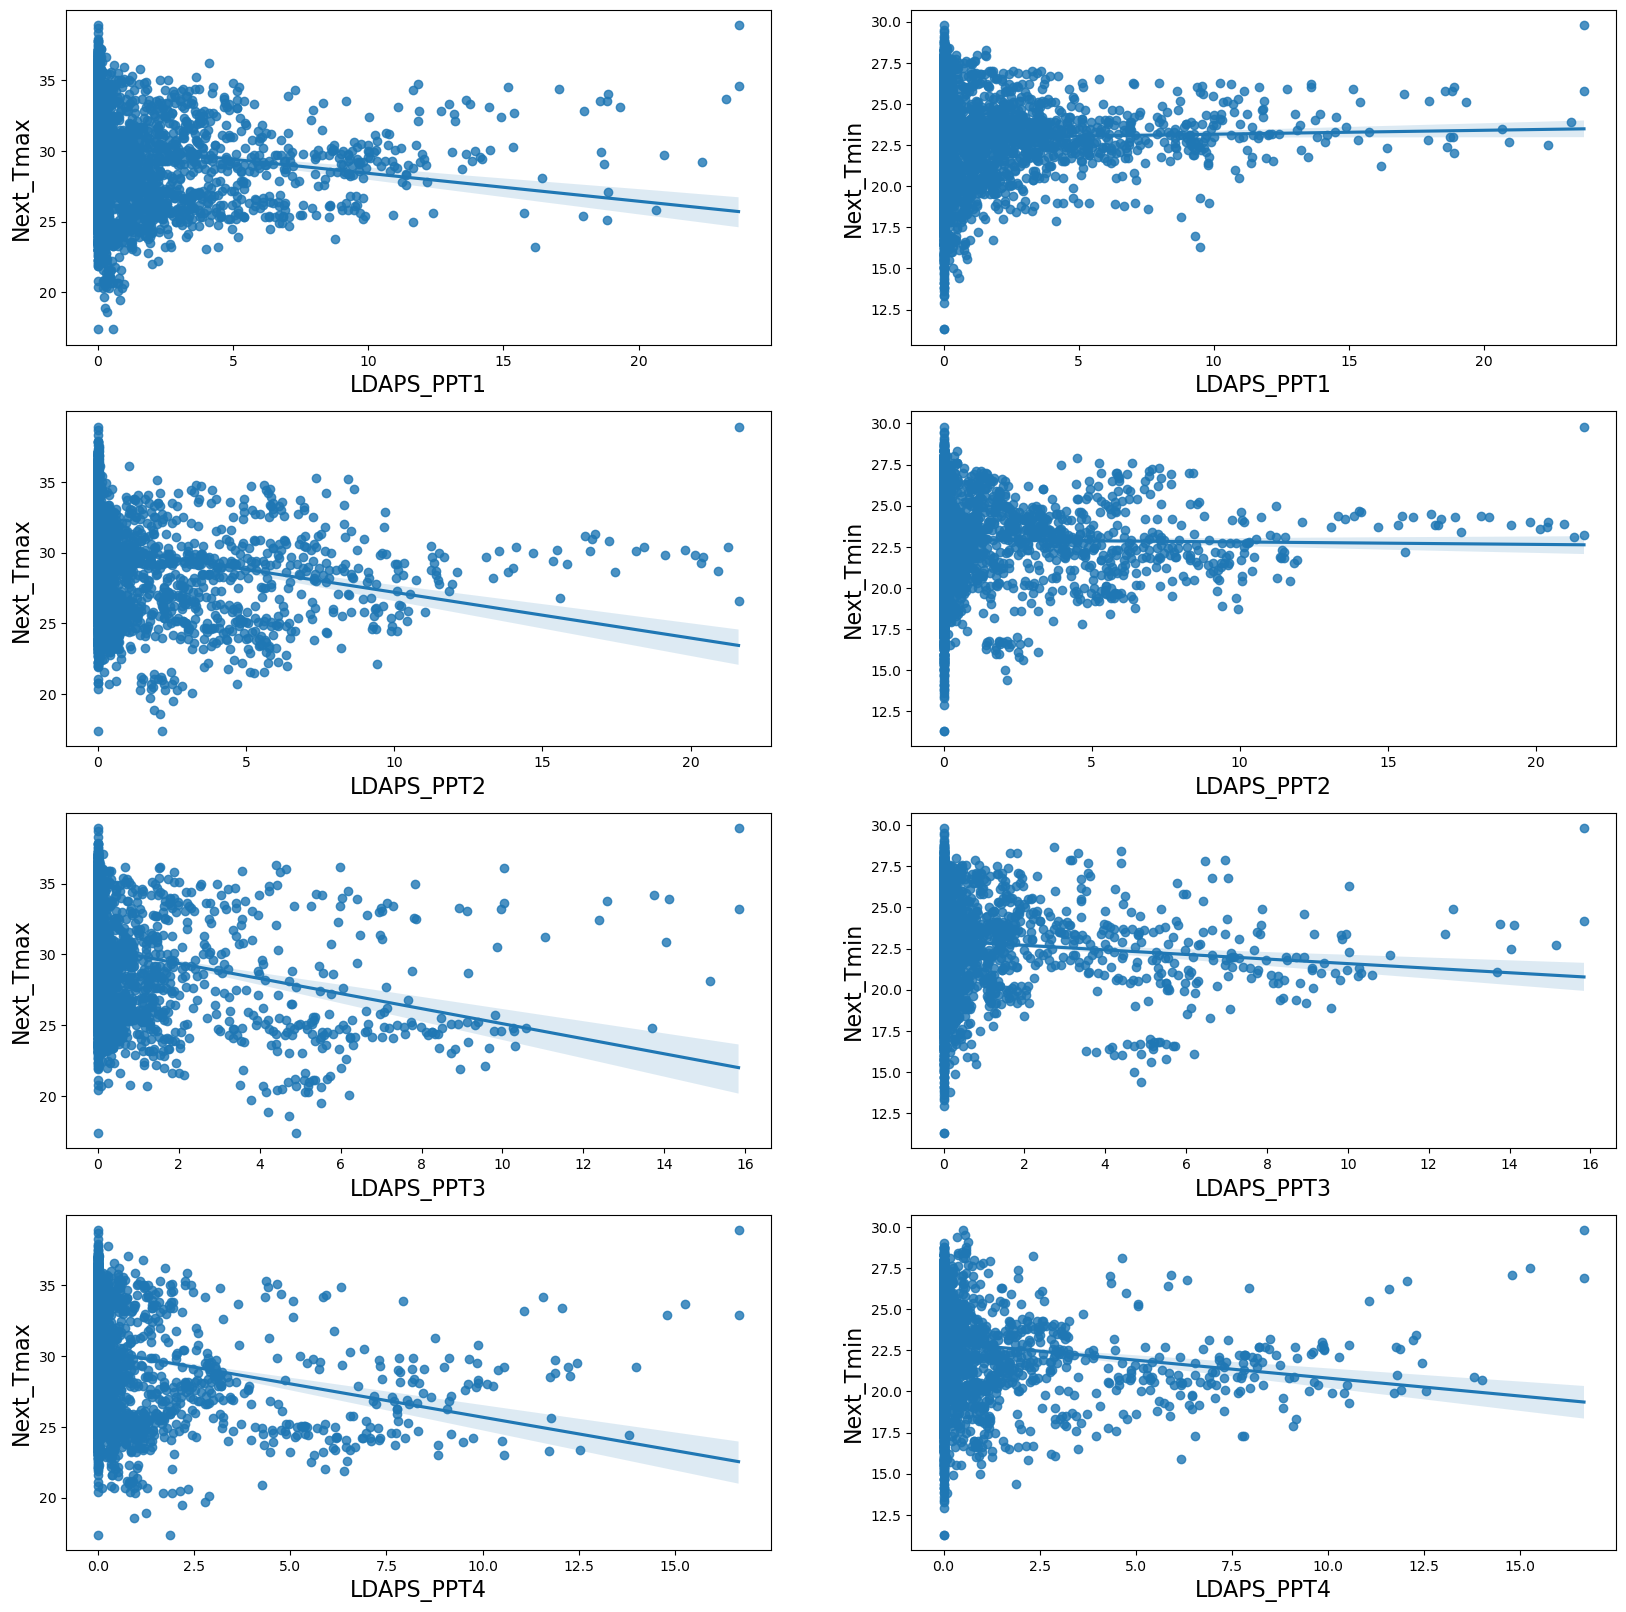

In [71]:
plt.figure(figsize=(20,20))

plt.subplot(4,2,1)
sns.regplot(x='LDAPS_PPT1', y='Next_Tmax', data= df)
plt.xlabel('LDAPS_PPT1', fontsize= 16)
plt.ylabel('Next_Tmax', fontsize= 16)


plt.subplot(4,2,2)
sns.regplot(x='LDAPS_PPT1', y='Next_Tmin', data= df)
plt.xlabel('LDAPS_PPT1', fontsize= 16)
plt.ylabel('Next_Tmin', fontsize= 16)



plt.subplot(4,2,3)
sns.regplot(x='LDAPS_PPT2', y='Next_Tmax', data= df)
plt.xlabel('LDAPS_PPT2', fontsize= 16)
plt.ylabel('Next_Tmax', fontsize= 16)



plt.subplot(4,2,4)
sns.regplot(x='LDAPS_PPT2', y='Next_Tmin', data= df)
plt.xlabel('LDAPS_PPT2', fontsize= 16)
plt.ylabel('Next_Tmin', fontsize= 16)


plt.subplot(4,2,5)
sns.regplot(x='LDAPS_PPT3', y='Next_Tmax', data= df)
plt.xlabel('LDAPS_PPT3', fontsize= 16)
plt.ylabel('Next_Tmax', fontsize= 16)

plt.subplot(4,2,6)
sns.regplot(x='LDAPS_PPT3', y='Next_Tmin', data= df)
plt.xlabel('LDAPS_PPT3', fontsize= 16)
plt.ylabel('Next_Tmin', fontsize= 16)



plt.subplot(4,2,7)
sns.regplot(x='LDAPS_PPT4', y='Next_Tmax', data= df)
plt.xlabel('LDAPS_PPT4', fontsize= 16)
plt.ylabel('Next_Tmax', fontsize= 16)



plt.subplot(4,2,8)
sns.regplot(x='LDAPS_PPT4', y='Next_Tmin', data= df)
plt.xlabel('LDAPS_PPT4', fontsize= 16)
plt.ylabel('Next_Tmin', fontsize= 16)

1. There is a negative relation between split average precipitation and Temprature

In [6]:
#Dropping the unwanted columns

df.drop(columns=['station','Date'], inplace=True)
df.head()

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0          28.7          21.4    58.255688    91.116364         28.074101   
1          31.9          21.6    52.263397    90.604721         29.850689   
2          31.6          23.3    48.690479    83.973587         30.091292   
3          32.0          23.4    58.239788    96.483688         29.704629   
4          31.4          21.9    56.174095    90.155128         29.113934   

   LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  LDAPS_CC2  ...  \
0         23.006936  6.818887   69.451805   0.233947   0.203896  ...   
1         24.035009  5.691890   51.937448   0.225508   0.251771  ...   
2         24.565633  6.138224   20.573050   0.209344   0.257469  ...   
3         23.326177  5.650050   65.727144   0.216372   0.226002  ...   
4         23.486480  5.735004  107.965535   0.151407   0.249995  ...   

   LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 23 columns]

In [7]:
df.shape

(7752, 23)

In [8]:
df.skew()

Present_Tmax       -0.265337
Present_Tmin       -0.369481
LDAPS_RHmin         0.303565
LDAPS_RHmax        -0.860210
LDAPS_Tmax_lapse   -0.228767
LDAPS_Tmin_lapse   -0.584737
LDAPS_WS            1.584975
LDAPS_LH            0.678315
LDAPS_CC1           0.465003
LDAPS_CC2           0.477041
LDAPS_CC3           0.646670
LDAPS_CC4           0.673700
LDAPS_PPT1          5.395178
LDAPS_PPT2          5.776835
LDAPS_PPT3          6.458608
LDAPS_PPT4          6.826930
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340943
Next_Tmin          -0.405143
dtype: float64

In [9]:
from sklearn.preprocessing import PowerTransformer,StandardScaler

pwr_tfr = PowerTransformer(method='yeo-johnson')
col = ['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4','lat','lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin']
df[col] = pwr_tfr.fit_transform(df[col].values)

In [10]:
#Cheking for skewness again
df.skew()

Present_Tmax       -0.035123
Present_Tmin       -0.012211
LDAPS_RHmin        -0.017178
LDAPS_RHmax        -0.116481
LDAPS_Tmax_lapse   -0.009402
LDAPS_Tmin_lapse   -0.018120
LDAPS_WS            0.002449
LDAPS_LH            0.058865
LDAPS_CC1           0.048127
LDAPS_CC2           0.046422
LDAPS_CC3           0.089672
LDAPS_CC4           0.129826
LDAPS_PPT1          1.463941
LDAPS_PPT2          1.646417
LDAPS_PPT3          1.824919
LDAPS_PPT4          2.059400
lat                 0.000000
lon                -0.198429
DEM                 0.039456
Slope               0.233968
Solar radiation    -0.176636
Next_Tmax          -0.038624
Next_Tmin          -0.013805
dtype: float64

We can see that skewness is removed from our data

# 1) Next_Tmax as Target variable

In [11]:
x=df.drop(['Next_Tmax', 'Next_Tmin'],axis=1)
ymax=df['Next_Tmax']
ymin= df['Next_Tmin']

In [12]:
Scaler = StandardScaler()
x_scalar = Scaler.fit_transform(x)

# Finding Best Random State

In [109]:
#Finding the best random state

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
maxAccu=0
maxRS=0
for i in range(1,150):
    x_train,x_test,ymax_train,ymax_test=train_test_split(x,ymax,test_size=0.30,random_state= i)
    le=LinearRegression()
    le.fit(x_train,ymax_train)
    pred=le.predict(x_test)
    acc=r2_score(ymax_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print('Best Accuracy is ',maxAccu,'at random state ',maxRS)

Best Accuracy is  0.7737311352035346 at random state  120


# Training & Testing of Data

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,ymax_train,ymax_test=train_test_split(x,ymax,test_size=0.3,random_state=120)

# Applying various models

In [112]:
# Using Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_auc_score,precision_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split

lg=LinearRegression()
lg.fit(x_train,ymax_train)
predlg=lg.predict(x_test)
print("r2 accuracy score is: ",r2_score(ymax_test,predlg))

for i in range(2,10):
    cvs = cross_val_score(lg,x_scalar, ymax,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())
    
print('\n Mean absolute error:',mean_absolute_error(ymax_test,predlg))
print('\n Mean squared error:',mean_squared_error(ymax_test,predlg))
print('\n Root Mean squared error:',np.sqrt(mean_squared_error(ymax_test,predlg)))

r2 accuracy score is:  0.7737311352035346
Cross Validation Score for cv= 2 is 0.6706603743961794
Cross Validation Score for cv= 3 is 0.7048369741711551
Cross Validation Score for cv= 4 is 0.6871899525696078
Cross Validation Score for cv= 5 is 0.684847733260081
Cross Validation Score for cv= 6 is 0.6846074649478796
Cross Validation Score for cv= 7 is 0.6825093496938831
Cross Validation Score for cv= 8 is 0.6721228416929769
Cross Validation Score for cv= 9 is 0.6146311717541812

 Mean absolute error: 0.36667928220291024

 Mean squared error: 0.23404383039214452

 Root Mean squared error: 0.48378076686877963


In [119]:
# Using Random Forest Regression

from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,ymax_train)
predRF=RF.predict(x_test)
print("r2 accuracy score is: ",r2_score(ymax_test,predRF))

for i in range(2,10):
    cvs = cross_val_score(RF,x_scalar, ymax,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())
    
print('\n Mean absolute error:',mean_absolute_error(ymax_test,predRF))
print('\n Mean squared error:',mean_squared_error(ymax_test,predRF))
print('\n Root Mean squared error:',np.sqrt(mean_squared_error(ymax_test,predRF)))

r2 accuracy score is:  0.8950858995396518
Cross Validation Score for cv= 2 is 0.6543407295227417
Cross Validation Score for cv= 3 is 0.680174669072299
Cross Validation Score for cv= 4 is 0.6697685266076618
Cross Validation Score for cv= 5 is 0.6758492272918707
Cross Validation Score for cv= 6 is 0.6726985853229955
Cross Validation Score for cv= 7 is 0.6714005319826233
Cross Validation Score for cv= 8 is 0.6617774012170243
Cross Validation Score for cv= 9 is 0.6105615132308393

 Mean absolute error: 0.24296143310585677

 Mean squared error: 0.10851911930513969

 Root Mean squared error: 0.3294224025550474


In [122]:
# Using XGB Regression

from xgboost import XGBRegressor
xb=XGBRegressor()
xb.fit(x_train,ymax_train)
predxb=xb.predict(x_test)
print("r2 accuracy score is: ",r2_score(ymax_test,predxb))

for i in range(2,11):
    cvs = cross_val_score(xb,x_scalar, ymax,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())
    
print('\n Mean absolute error:',mean_absolute_error(ymax_test,predxb))
print('\n Mean squared error:',mean_squared_error(ymax_test,predxb))
print('\n Root Mean squared error:',np.sqrt(mean_squared_error(ymax_test,predxb)))

r2 accuracy score is:  0.9130808979202716
Cross Validation Score for cv= 2 is 0.6583199748336371
Cross Validation Score for cv= 3 is 0.6603452488607525
Cross Validation Score for cv= 4 is 0.6686772824639051
Cross Validation Score for cv= 5 is 0.6584927575262942
Cross Validation Score for cv= 6 is 0.6506309587409939
Cross Validation Score for cv= 7 is 0.6589078426304715
Cross Validation Score for cv= 8 is 0.6438085922428003
Cross Validation Score for cv= 9 is 0.5959211041314058
Cross Validation Score for cv= 10 is 0.5834243670660244

 Mean absolute error: 0.22092679319856828

 Mean squared error: 0.08990578356100552

 Root Mean squared error: 0.29984293148414476


In [123]:
# Using Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,ymax_train)
preddt=dt.predict(x_test)
print("r2 accuracy score is: ",r2_score(ymax_test,preddt))

for i in range(2,15):
    cvs = cross_val_score(dt,x_scalar, ymax,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())
    
print('\n Mean absolute error:',mean_absolute_error(ymax_test,preddt))
print('\n Mean squared error:',mean_squared_error(ymax_test,preddt))
print('\n Root Mean squared error:',np.sqrt(mean_squared_error(ymax_test,preddt)))

r2 accuracy score is:  0.7570434968023917
Cross Validation Score for cv= 2 is 0.4334077626380477
Cross Validation Score for cv= 3 is 0.4374163061840906
Cross Validation Score for cv= 4 is 0.44417113581283585
Cross Validation Score for cv= 5 is 0.3957576743869139
Cross Validation Score for cv= 6 is 0.41502448545494514
Cross Validation Score for cv= 7 is 0.4098954493591617
Cross Validation Score for cv= 8 is 0.40261941921561123
Cross Validation Score for cv= 9 is 0.2576258292097976
Cross Validation Score for cv= 10 is 0.28743297556357994
Cross Validation Score for cv= 11 is 0.25855718731097765
Cross Validation Score for cv= 12 is 0.2356755129848074
Cross Validation Score for cv= 13 is 0.15905034480951555
Cross Validation Score for cv= 14 is 0.2211578747069264

 Mean absolute error: 0.35647263303329413

 Mean squared error: 0.25130488314509725

 Root Mean squared error: 0.5013031848543327


XG Boost has the highest accuracy score. So, proceeding further to HyperParameter tuning for this model

# HyperParameter Tuning

In [13]:
parameter_grid = {
    'n_estimators': [100, 400, 800],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.05, 0.1, 0.20],
    'min_child_weight': [1, 10, 100],
    "criterion": ["gini", "entropy"]
    }

In [19]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_auc_score,precision_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor
xb=XGBRegressor()

XG_rand = RandomizedSearchCV(estimator=xb, param_distributions=parameter_grid, n_jobs=2,verbose=2, cv =9)

XG_rand.fit(x_train, ymax_train)
ymax_pred = XG_rand.predict(x_test)

print("Accuracy: ",r2_score(ymax_test, ymax_pred)*100)
for i in range(2,8):
    cvs = cross_val_score(XG_rand,x_scalar, ymax,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('The mean absolute error', mean_absolute_error(ymax_test, ymax_pred))
print('The mean squared error', mean_squared_error(ymax_test, ymax_pred))
print('root mean square error', np.sqrt(mean_squared_error(ymax_test, ymax_pred)))

print('*'*60)

Fitting 9 folds for each of 10 candidates, totalling 90 fits
Accuracy:  92.23820610776227
Fitting 9 folds for each of 10 candidates, totalling 90 fits
Fitting 9 folds for each of 10 candidates, totalling 90 fits
Cross Validation Score for cv= 2 is 0.6757613549737547
Fitting 9 folds for each of 10 candidates, totalling 90 fits
Fitting 9 folds for each of 10 candidates, totalling 90 fits
Fitting 9 folds for each of 10 candidates, totalling 90 fits
Cross Validation Score for cv= 3 is 0.697458078306985
Fitting 9 folds for each of 10 candidates, totalling 90 fits
Fitting 9 folds for each of 10 candidates, totalling 90 fits
Fitting 9 folds for each of 10 candidates, totalling 90 fits
Fitting 9 folds for each of 10 candidates, totalling 90 fits
Cross Validation Score for cv= 4 is 0.6872183121212592
Fitting 9 folds for each of 10 candidates, totalling 90 fits
Fitting 9 folds for each of 10 candidates, totalling 90 fits
Fitting 9 folds for each of 10 candidates, totalling 90 fits
Fitting 9 fold

# Saving the model

In [15]:
import joblib
joblib.dump(xb,'Project_Temparature Forecast_max.pkl')

['Project_Temparature Forecast_max.pkl']

# 2) Next_Tmin as Target variable

# Finding best Random state

In [21]:
#Finding the best random state

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
maxAccu=0
maxRS=0
for i in range(1,150):
    x_train,x_test,ymin_train,ymin_test=train_test_split(x,ymin,test_size=0.30,random_state= i)
    le=LinearRegression()
    le.fit(x_train,ymin_train)
    pred=le.predict(x_test)
    acc=r2_score(ymin_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print('Best Accuracy is ',maxAccu,'at random state ',maxRS)

Best Accuracy is  0.8409187271873126 at random state  103


# Training & Testing of Data

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,ymin_train,ymin_test=train_test_split(x,ymin,test_size=0.3,random_state=103)

# Applying various models

In [23]:
# Using Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_auc_score,precision_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split

lg=LinearRegression()
lg.fit(x_train,ymin_train)
predlg=lg.predict(x_test)
print("r2 accuracy score is: ",r2_score(ymin_test,predlg))

for i in range(2,10):
    cvs = cross_val_score(lg,x_scalar, ymin,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())
    
print('\n Mean absolute error:',mean_absolute_error(ymin_test,predlg))
print('\n Mean squared error:',mean_squared_error(ymin_test,predlg))
print('\n Root Mean squared error:',np.sqrt(mean_squared_error(ymin_test,predlg)))

r2 accuracy score is:  0.8409187271873126
Cross Validation Score for cv= 2 is 0.7997577315164738
Cross Validation Score for cv= 3 is 0.7729331502482598
Cross Validation Score for cv= 4 is 0.7846641774596612
Cross Validation Score for cv= 5 is 0.7701350098784332
Cross Validation Score for cv= 6 is 0.7558077719726438
Cross Validation Score for cv= 7 is 0.7652340916775231
Cross Validation Score for cv= 8 is 0.7633623955359923
Cross Validation Score for cv= 9 is 0.6858935073908802

 Mean absolute error: 0.3137873315861474

 Mean squared error: 0.16185716186353918

 Root Mean squared error: 0.40231475471767025


In [24]:
# Using Random Forest Regression

from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,ymin_train)
predRF=RF.predict(x_test)
print("r2 accuracy score is: ",r2_score(ymin_test,predRF))

for i in range(2,10):
    cvs = cross_val_score(RF,x_scalar, ymin,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())
    
print('\n Mean absolute error:',mean_absolute_error(ymin_test,predRF))
print('\n Mean squared error:',mean_squared_error(ymin_test,predRF))
print('\n Root Mean squared error:',np.sqrt(mean_squared_error(ymin_test,predRF)))

r2 accuracy score is:  0.9049242507802795
Cross Validation Score for cv= 2 is 0.7803928022183283
Cross Validation Score for cv= 3 is 0.7547658518326986
Cross Validation Score for cv= 4 is 0.7732991104120639
Cross Validation Score for cv= 5 is 0.7648733700389097
Cross Validation Score for cv= 6 is 0.7482557004586997
Cross Validation Score for cv= 7 is 0.7558856424180259
Cross Validation Score for cv= 8 is 0.7577442530740133
Cross Validation Score for cv= 9 is 0.6750038594479553

 Mean absolute error: 0.23668856879208577

 Mean squared error: 0.09673477373338092

 Root Mean squared error: 0.31102214347756807


In [26]:
# Using XGB Regression

from xgboost import XGBRegressor
xb=XGBRegressor()
xb.fit(x_train,ymin_train)
predxb=xb.predict(x_test)
print("r2 accuracy score is: ",r2_score(ymin_test,predxb))

for i in range(2,6):
    cvs = cross_val_score(xb,x_scalar, ymin,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())
    
print('\n Mean absolute error:',mean_absolute_error(ymin_test,predxb))
print('\n Mean squared error:',mean_squared_error(ymin_test,predxb))
print('\n Root Mean squared error:',np.sqrt(mean_squared_error(ymin_test,predxb)))

r2 accuracy score is:  0.9300032138187168
Cross Validation Score for cv= 2 is 0.7762295282503119
Cross Validation Score for cv= 3 is 0.741833145890462
Cross Validation Score for cv= 4 is 0.7789263852737418
Cross Validation Score for cv= 5 is 0.7576833602295924

 Mean absolute error: 0.20274353253291208

 Mean squared error: 0.071218195269355

 Root Mean squared error: 0.26686737393198706


In [27]:
# Using Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,ymin_train)
preddt=dt.predict(x_test)
print("r2 accuracy score is: ",r2_score(ymin_test,preddt))

for i in range(2,6):
    cvs = cross_val_score(dt,x_scalar, ymin,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())
    
print('\n Mean absolute error:',mean_absolute_error(ymin_test,preddt))
print('\n Mean squared error:',mean_squared_error(ymin_test,preddt))
print('\n Root Mean squared error:',np.sqrt(mean_squared_error(ymin_test,preddt)))

r2 accuracy score is:  0.7832661313487862
Cross Validation Score for cv= 2 is 0.6148606922125639
Cross Validation Score for cv= 3 is 0.5350890676765916
Cross Validation Score for cv= 4 is 0.560948725356816
Cross Validation Score for cv= 5 is 0.5690783948334859

 Mean absolute error: 0.34700032343152365

 Mean squared error: 0.22051576681119422

 Root Mean squared error: 0.46959106338514817


XG Boost has the highest score. So, proceeding further to HyperParameter tuning for this model

# HyperParameter Tuning

In [28]:
parameter_grid = {
    'n_estimators': [100, 400, 800],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.05, 0.1, 0.20],
    'min_child_weight': [1, 10, 100],
    "criterion": ["gini", "entropy"]
    }

In [31]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_auc_score,precision_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor
xb=XGBRegressor()

XG_rand = RandomizedSearchCV(estimator=xb, param_distributions=parameter_grid, n_jobs=2,verbose=2, cv =9)

XG_rand.fit(x_train, ymin_train)
ymin_pred = XG_rand.predict(x_test)

print("Accuracy: ",r2_score(ymin_test, ymin_pred)*100)
for i in range(2,6):
    cvs = cross_val_score(XG_rand,x_scalar, ymin,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('The mean absolute error', mean_absolute_error(ymin_test, ymin_pred))
print('The mean squared error', mean_squared_error(ymin_test, ymin_pred))
print('root mean square error', np.sqrt(mean_squared_error(ymin_test, ymin_pred)))

print('*'*60)

Fitting 9 folds for each of 10 candidates, totalling 90 fits
Accuracy:  94.32542273233888
Fitting 9 folds for each of 10 candidates, totalling 90 fits
Fitting 9 folds for each of 10 candidates, totalling 90 fits
Cross Validation Score for cv= 2 is 0.7918989514444497
Fitting 9 folds for each of 10 candidates, totalling 90 fits
Fitting 9 folds for each of 10 candidates, totalling 90 fits
Fitting 9 folds for each of 10 candidates, totalling 90 fits
Cross Validation Score for cv= 3 is 0.7636538936682059
Fitting 9 folds for each of 10 candidates, totalling 90 fits
Fitting 9 folds for each of 10 candidates, totalling 90 fits
Fitting 9 folds for each of 10 candidates, totalling 90 fits
Fitting 9 folds for each of 10 candidates, totalling 90 fits
Cross Validation Score for cv= 4 is 0.7892336692292006
Fitting 9 folds for each of 10 candidates, totalling 90 fits
Fitting 9 folds for each of 10 candidates, totalling 90 fits
Fitting 9 folds for each of 10 candidates, totalling 90 fits
Fitting 9 fol

# Saving the model

In [32]:
import joblib
joblib.dump(xb,'Project_Temparature Forecast_min.pkl')

['Project_Temparature Forecast_min.pkl']